# Machine Learning: AllLife Bank Personal Loan Campaign

Author: James Somerville

Date: February 2, 2024
 
*Note: GitHub Copilot was used in Visual Studio Code to assist in this project. Prompts are shown in comments.*

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [365]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [366]:
df = pd.read_csv("Loan_Modelling.csv")
# copying data to another variable to avoid any changes to original data
df_copy = df.copy()

## Data Overview

* Observations
* Sanity checks

In [367]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [368]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


In [369]:
df.shape

(5000, 14)

There are 5000 rows with 14 columns.

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All columns are integer except CCAvg which is decimal datatype. There are no null values in the dataset.

In [371]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.00000,2500.50000,1443.52000,1.00000,1250.75000,2500.50000,3750.25000,5000.00000
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000


In [372]:
'''Count the number of rows where Experience is negative. Print as a single number.'''
df[df["Experience"] < 0].count()[1]

52

Experience has a minimum value of -3, and there are 52 negative values for Experience, which does not make sense for a categorical variable. These will need to be treated. For the sake of this exercise it will be assumed the negative sign was inaccurate and flip the values to positive.

In [373]:
'''Convert all negative values to positive values in the column "Experience" of df'''
df["Experience"] = df["Experience"].abs()
'''Check the minimum value in the column "Experience" of df'''
df["Experience"].min()

0

No negative Experience values remain.

In [374]:
# check for duplicate values
df.duplicated().sum()

0

No duplicate rows are found.

In [375]:
# check unique values in each column
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

Drop the ID column as it is unique for each row and not valuable for analysis.

In [376]:
df.drop(["ID"], axis=1, inplace=True)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**The below functions need to be defined to carry out the EDA. They were obtained from the Mentored Learning Session notebook.**

In [377]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [378]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [379]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [380]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

### Univariate Analysis

#### Observations on Mortgages

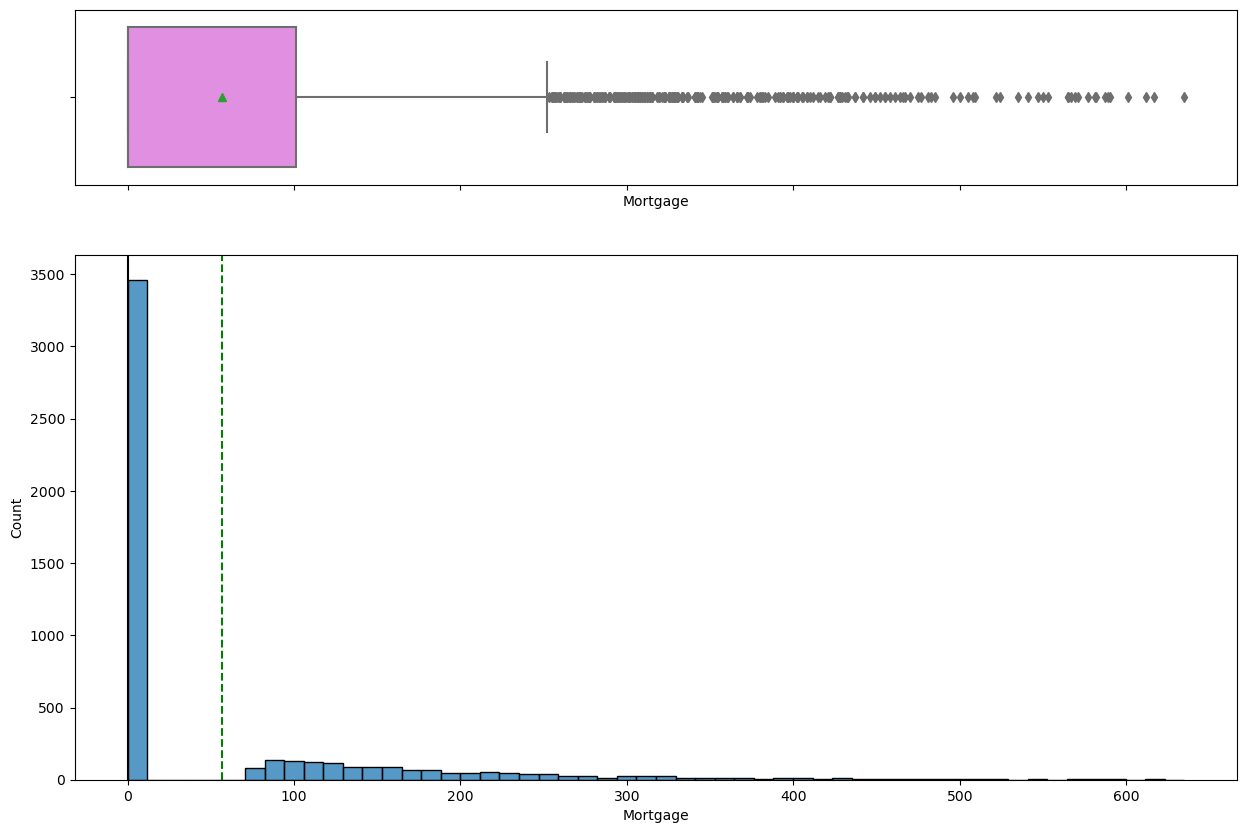

In [381]:
'''Create a histogram and boxplot for the "Mortgage" column of df'''
histogram_boxplot(df, "Mortgage")

- Q: What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
   - A: The distribution of mortgages is right skewed with by far the most common value being no mortgage. 50% of mortgages are $100,000 or less. But there are many outliers above the 75% percentile approximately $250,000 and above.

#### Analysis of Credit Card (AllLife and external)

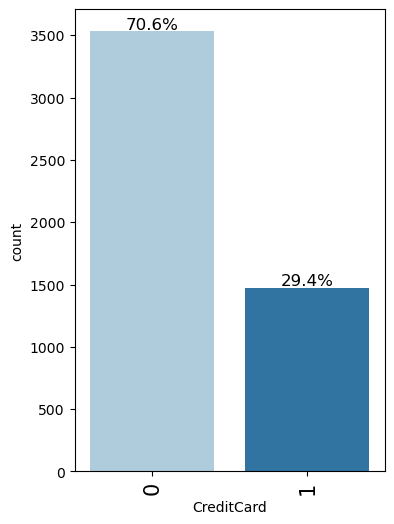

In [382]:
'''Create a labeled barplot for the "CreditCard" column of df'''
labeled_barplot(df, "CreditCard", perc=True)

In [383]:
'''Count where CreditCard is 1'''
df["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

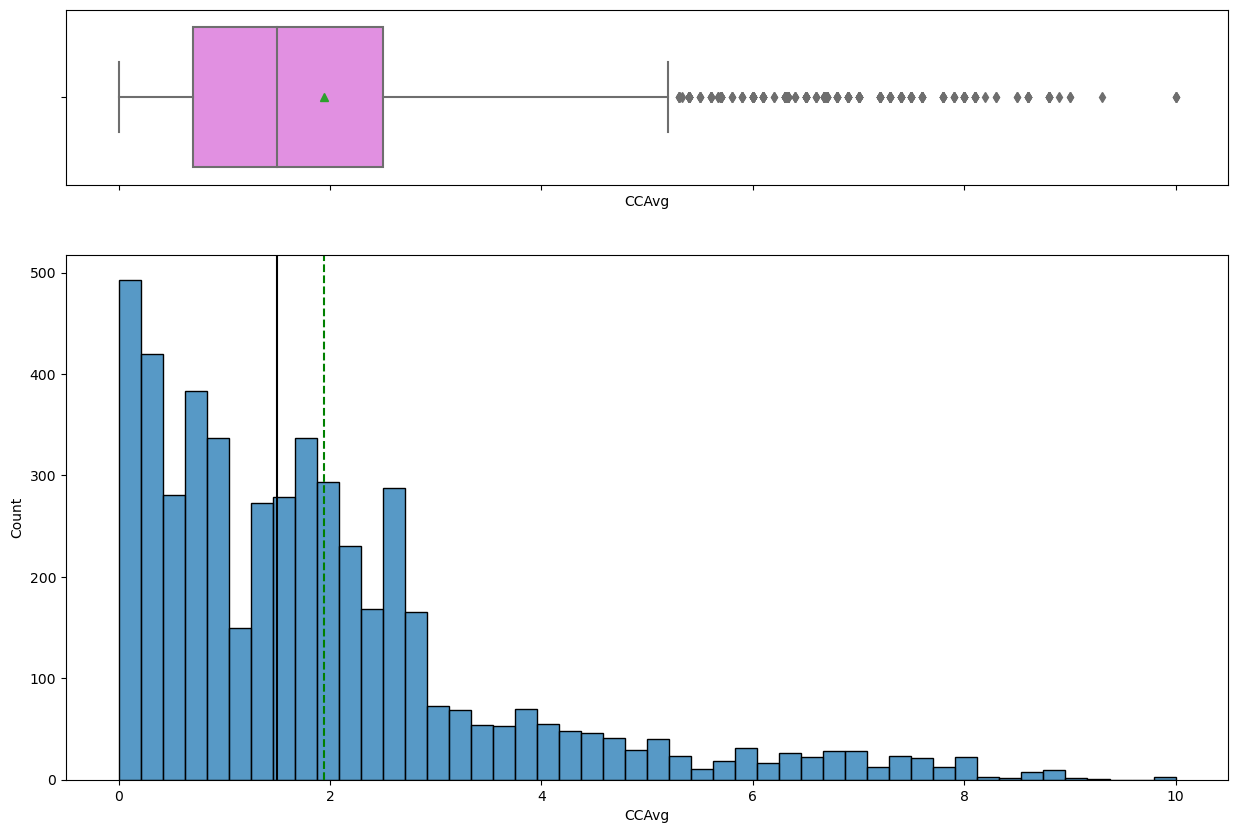

In [384]:
'''Create a histogram and boxplot for the "CCAvg" column of df'''
histogram_boxplot(df, "CCAvg")

In [385]:
'''What is the count of df where "CCAvg" is greater than 0 or "CreditCard" is greater than 0?'''
count_ccavg_or_creditcard_greater_than_zero = (
    (df["CCAvg"] > 0) | (df["CreditCard"] > 0)
).sum()
count_ccavg_or_creditcard_greater_than_zero

4922

- Q: How many customers have credit cards?
   - A: 4922 customers have an external credit card and/or carry an AllLife credit card balance on average (CCAvg). CCAvg is the best proxy attribute to denote customers having an AllLife credit card. However, it is probably an undercount as some people pay off their balance each month or don't use their credit.
- Approximately 29% or 1470 of customers have a credit card with another financial institution.
- 50% of customers have an AllLife credit card average balance between approximately $1000 and $2500 and a average of approximately $2000.
- The credit card average balance mean is high due to a highly right-skewed datset with many large outliers.

#### Observations on Age

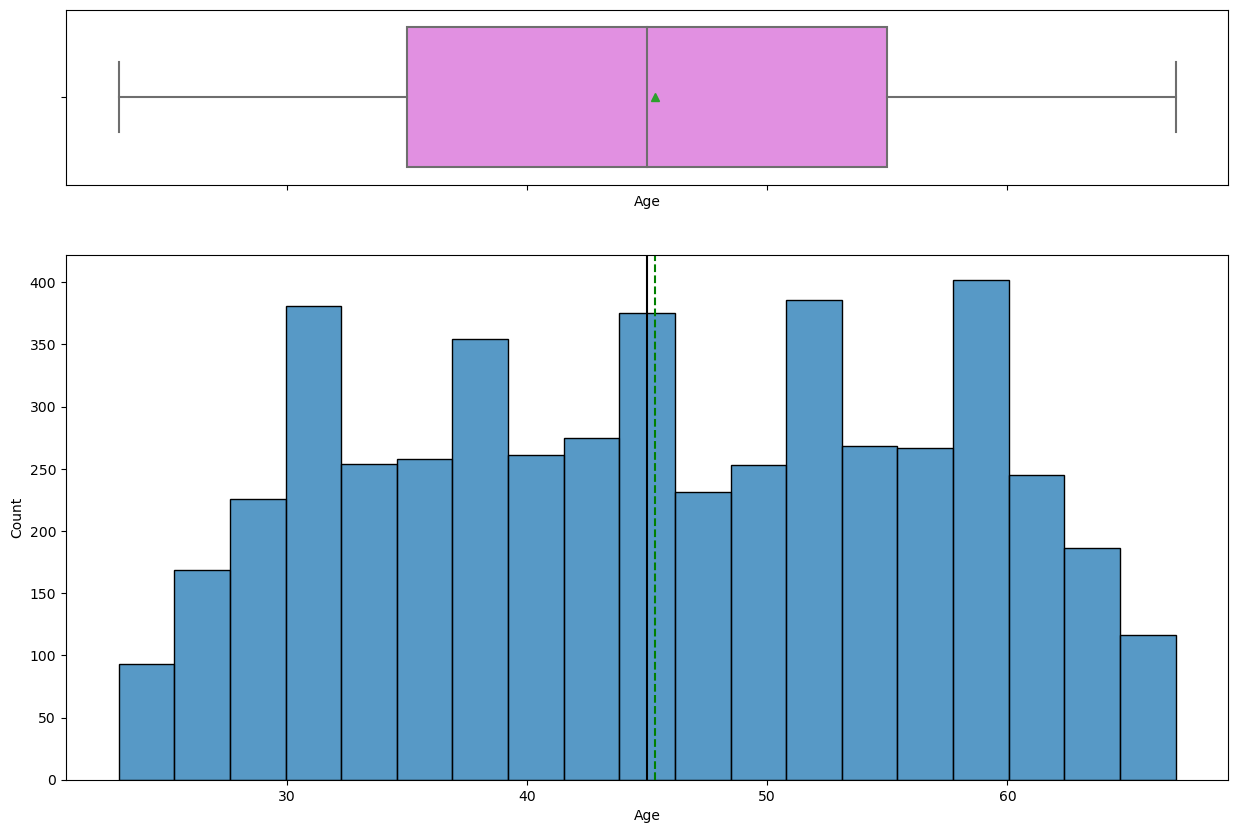

In [386]:
histogram_boxplot(df, "Age")

- Age range is has a normal and rather uniform distribution. The median and mean age are both approximately 45.

#### Observations on Experience

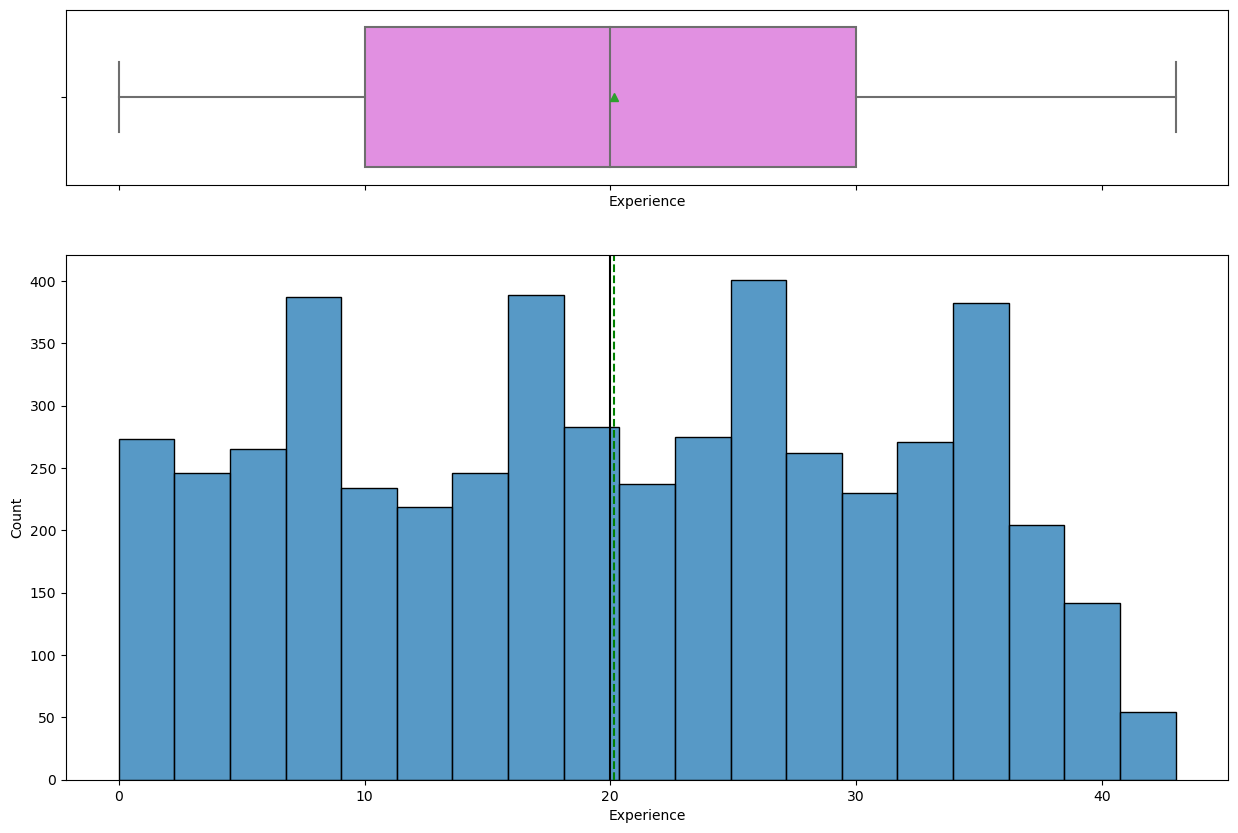

In [387]:
histogram_boxplot(df, "Experience")

- Experience is relatively uniformly distributed except it tapers off after about 35 years. The median and mean are approximately 20 years of experience.

#### Observations on Income

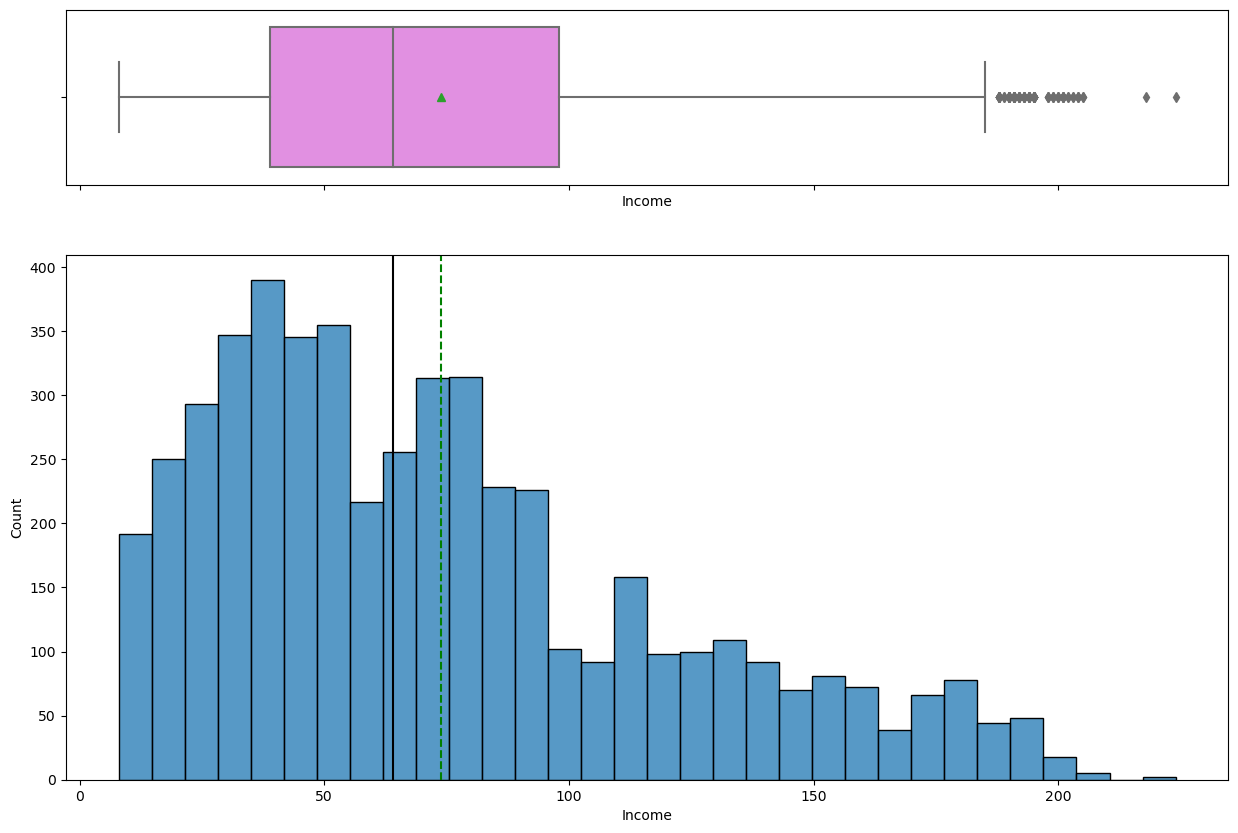

In [388]:
histogram_boxplot(df, "Income")

- Income is highly skewed right. 50% of customers' income falls within approximately $40,000 to $100,000 with a median of approximately $75,000.

#### Observations on Zipcode

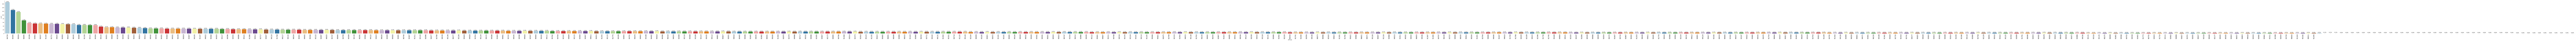

In [389]:
labeled_barplot(df, "ZIPCode", perc=True)

- There are a broad range of zipcodes. In actuality this is a categorical variable, not numeric.

#### Observations on Family

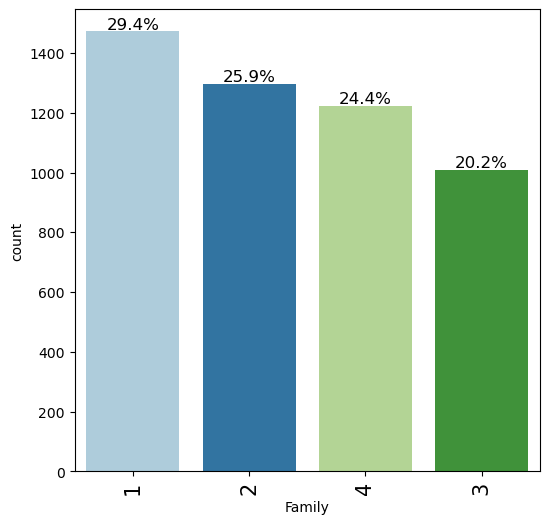

In [390]:
labeled_barplot(df, "Family", perc=True)

- Family size is between 1 and 4 with singles being the most common.

#### Observations on Credit Card Spending

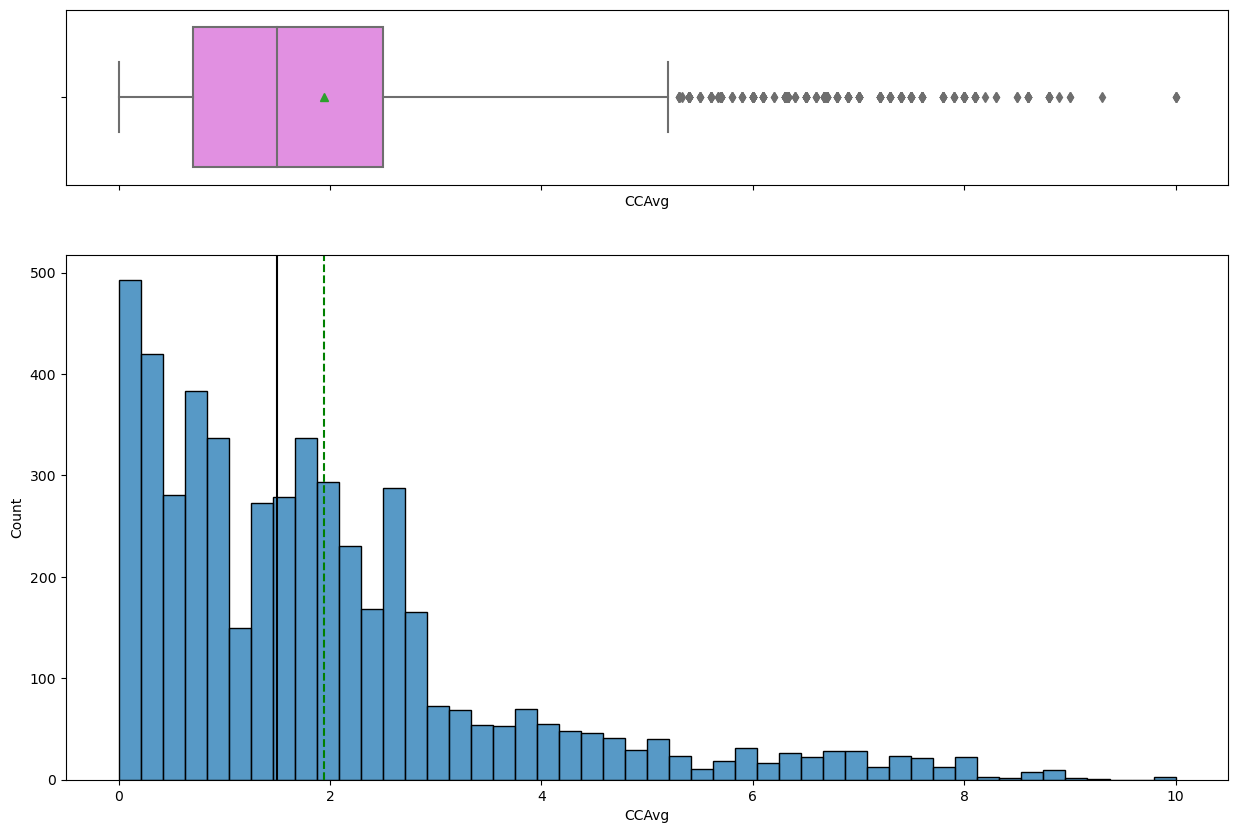

In [391]:
histogram_boxplot(df, "CCAvg")

- Credit card spending is highly right-skewed. No credit card debt is the most common.
- 50% of customers spend between $1,000 and $3,000 per month on their credit card(s).
- There are many outliers spending above $5,000 per month.

#### Observations on Education

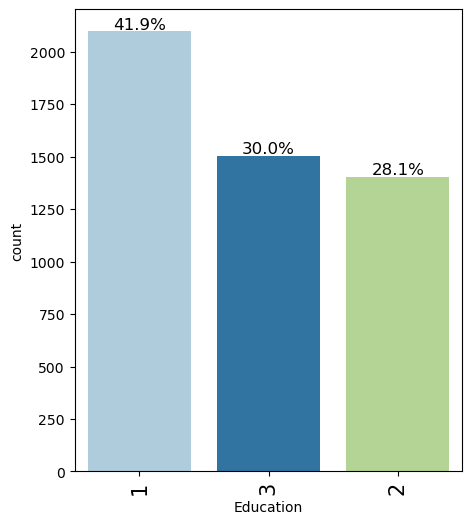

In [392]:
labeled_barplot(df, "Education", perc=True)

- Highest education level is most commonly at an undergrad level with 42% of customers.

#### Observations on Securities_Account

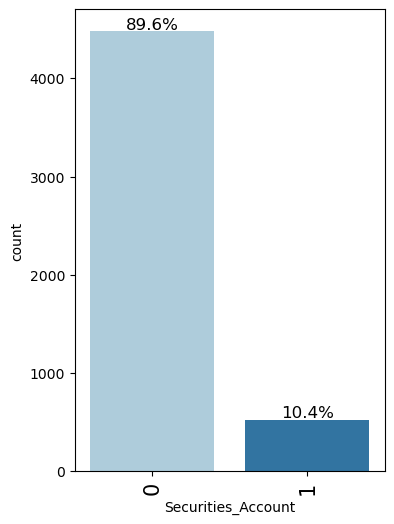

In [393]:
labeled_barplot(df, "Securities_Account", perc=True)

- 90% of customers do not have securities accounts with the bank.

#### Observations on CD_Account

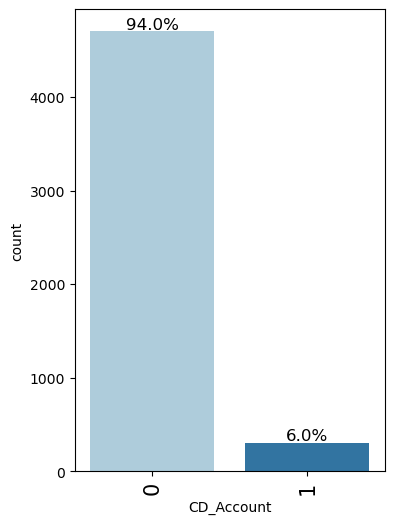

In [394]:
labeled_barplot(df, "CD_Account", perc=True)

- 94% of customers do not have a CD account with the bank.

#### Observations on Online

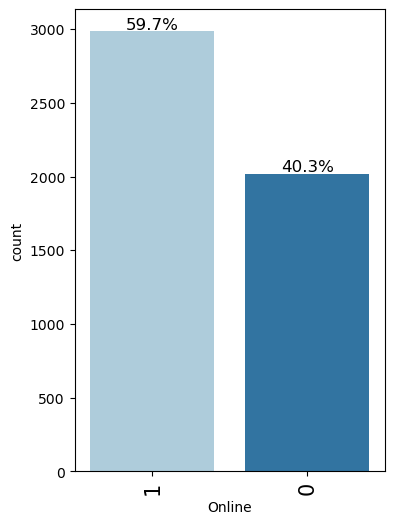

In [395]:
labeled_barplot(df, "Online", perc=True)

- 60% of customers use online banking.

#### Observations on CreditCard

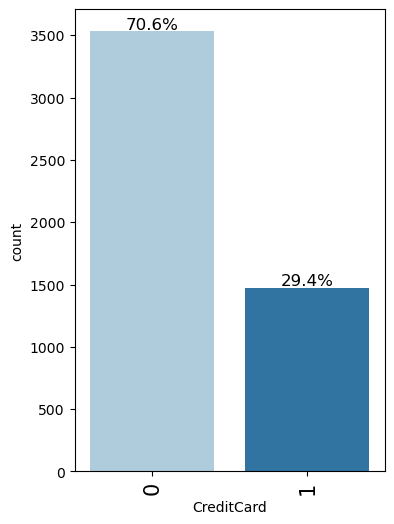

In [396]:
labeled_barplot(df, "CreditCard", perc=True)

- 71% of customers do not have credit cards with other banks.

### Bivariate Analysis
#### Correlation Check

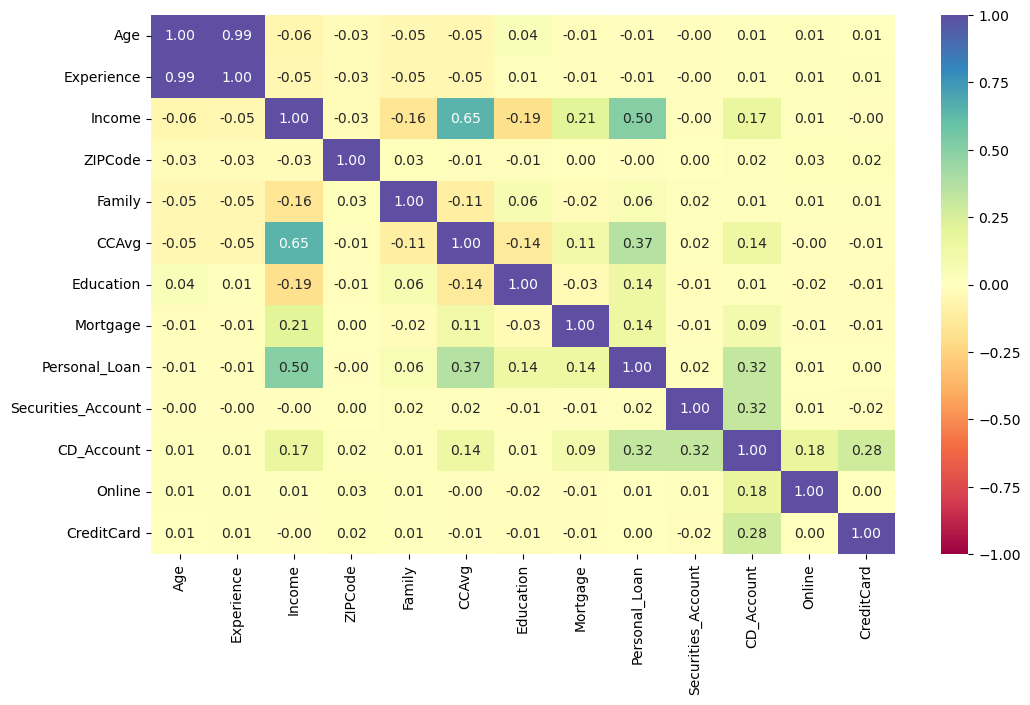

In [397]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Q: What are the attributes that have a strong correlation with the target attribute (personal loan)?
   - A: Income is the only attribute with even a moderate correlation (.5 correlation coefficient). CCAvg and CD_Account have weak correlation coefficients (.37 and .32, respectively). The rest are very weak.
- Overall, Experience and Age are the two attributes with a very strong correlation (.99). Income and CCAvg have a fairly strong correlation as well (.65). Other relationships have weak correlation.

#### Observations on Personal Loan by Age

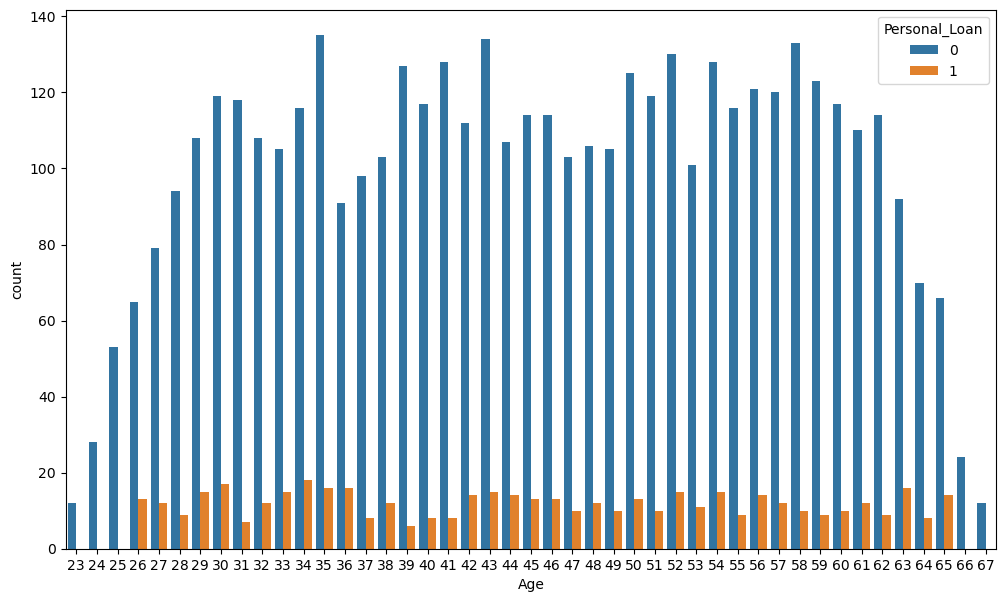

In [398]:
'''Present a chart that shows Personal Loan by Age'''
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x="Age", hue="Personal_Loan")
plt.show()

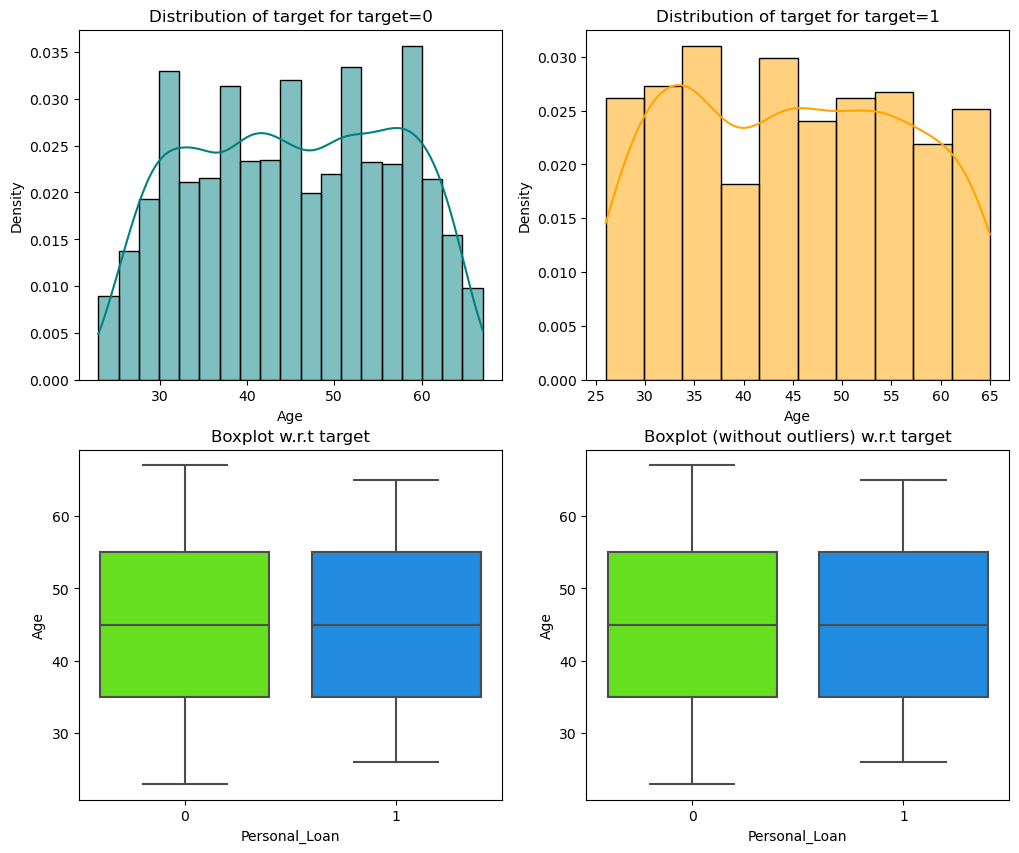

In [399]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

- Q: How does a customer's interest in purchasing a loan vary with their age?
  - A: Customers ages range between mid-20s and mid-60s. The distribution of loans by age is pretty uninform. The percentage of customers acquiring loans downwards with age starting in the 50s. However, 50% of customers with loans fall between 35 and 55.

#### Observations on Personal Loan by Education Level

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


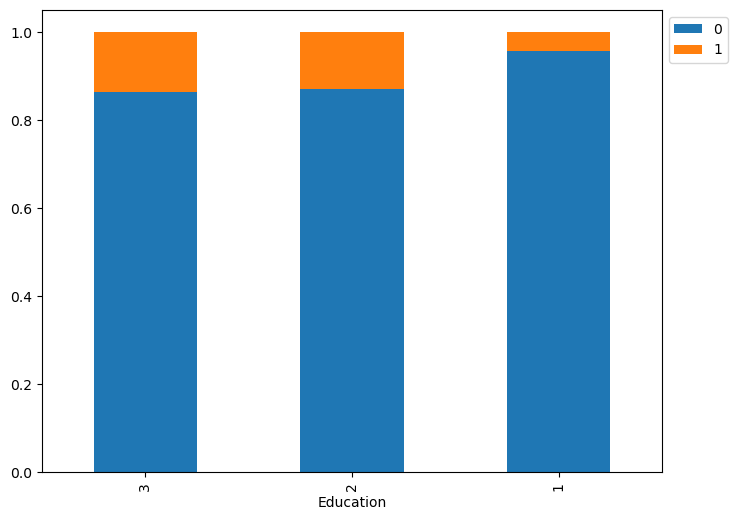

In [400]:
stacked_barplot(df, "Education", "Personal_Loan")

- Q: How does a customer's interest in purchasing a loan vary with their education?
  - A: As customers' education level increases, the interest in personal loans rises.

#### Observations on Personal Loan by Experience

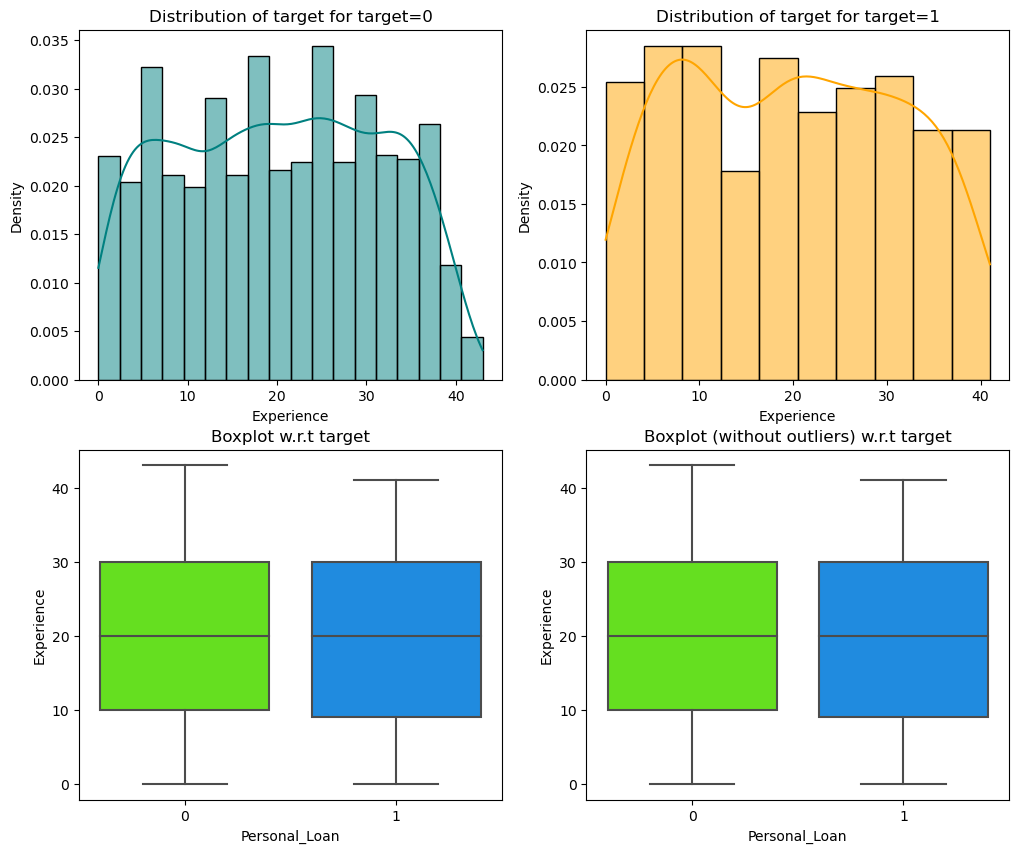

In [401]:
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")

- Loans are normally distributed across experience levels.

#### Observations on Personal Loan by Income

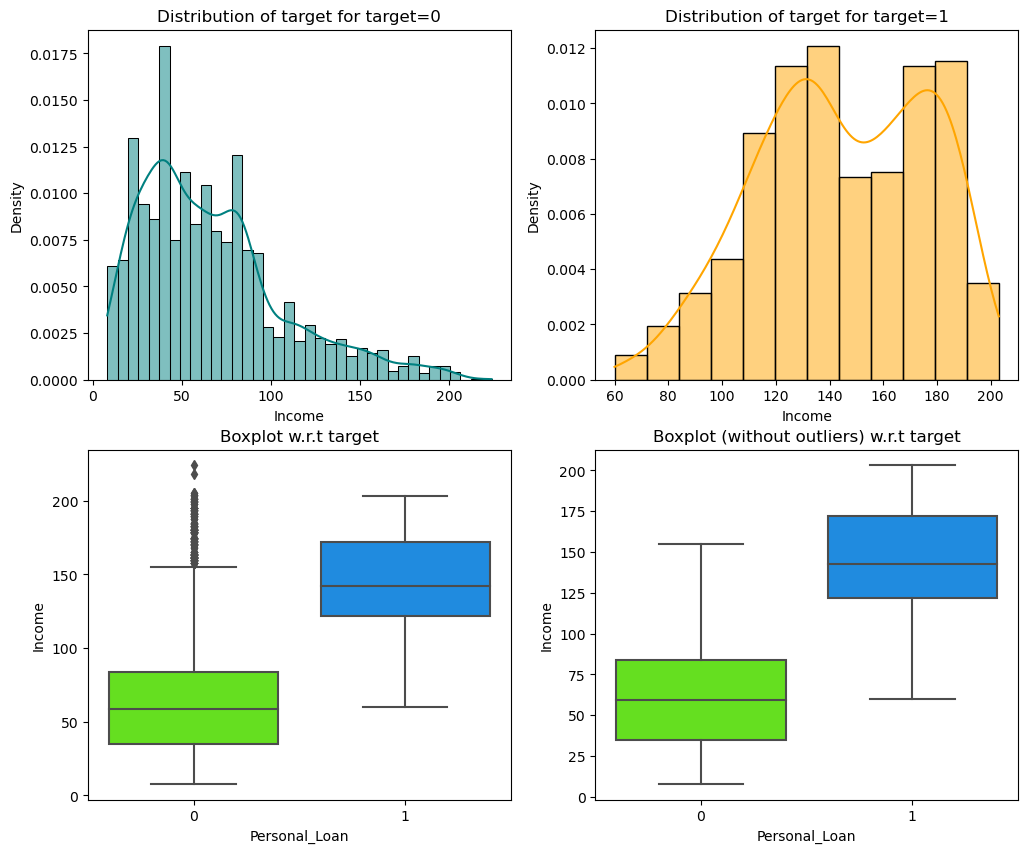

In [402]:
distribution_plot_wrt_target(df, "Income", "Personal_Loan")

- Customers without loans is right-skewed across the income range. Conversely, customers with loans are left-skewed across income range.
- Generally customers with loans have higher income than those without loans.

#### Observations on Personal Loan by Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


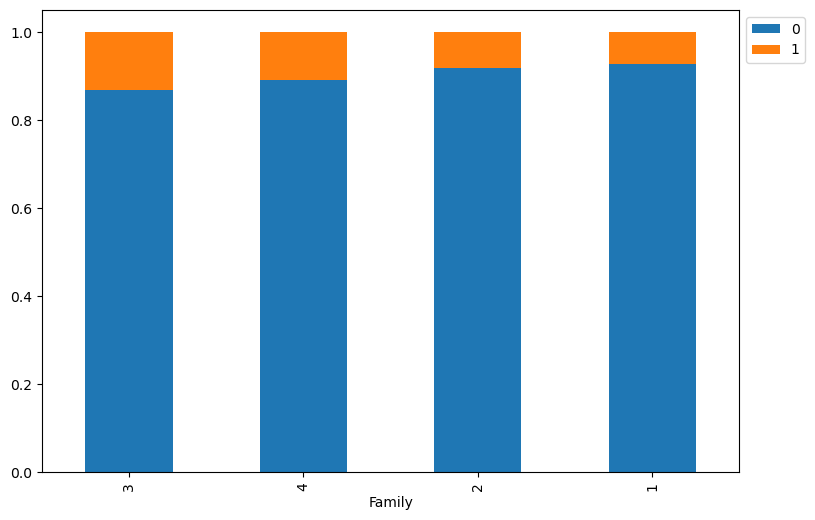

In [403]:
stacked_barplot(df, "Family", "Personal_Loan")

- Loans are fairly uniformally distributed across family sizes. Though larger families (3 or 4) are more likely to have a loan.

#### Observations on Personal Loan by CCAvg

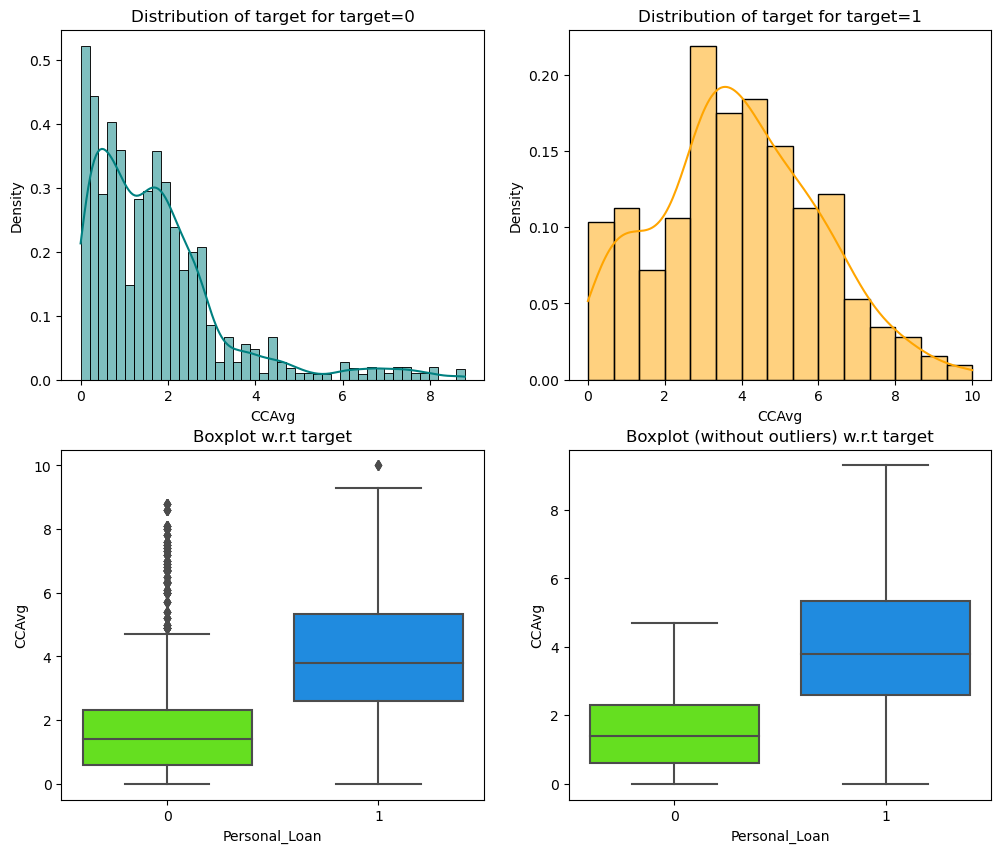

In [404]:
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")

- Customers without loans are highly righ-skewed, meaning they have lower amounts of credit card debt.
- Customers with loans have fairly normal distribution of credit card debt.
- There are many outliers with high credit card balances for those without loans. Perhaps they use their credit card rather than acquiring a personal loan.

#### Observations on Personal Loan by Mortgage

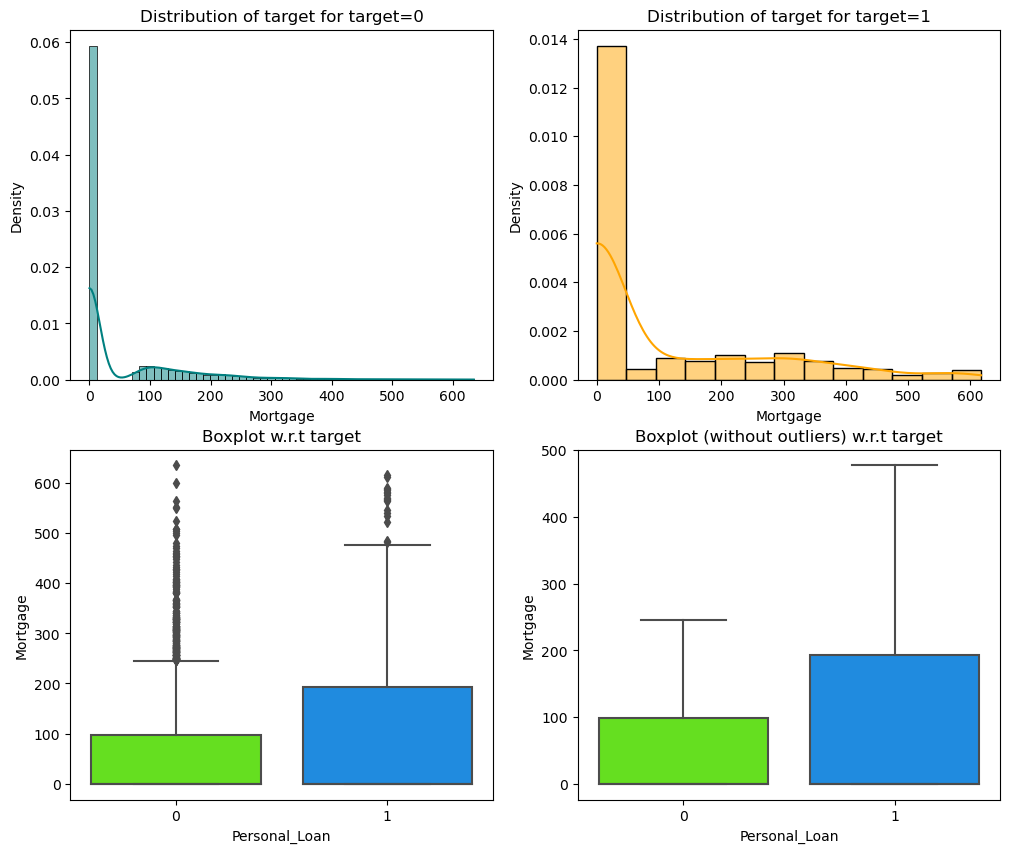

In [405]:
distribution_plot_wrt_target(df, "Mortgage", "Personal_Loan")

- Most customers overall don't have mortgage debt. However there are many outliers with high mortgage debt for both those with and without personal loans.

#### Observations on Personal Loan by Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


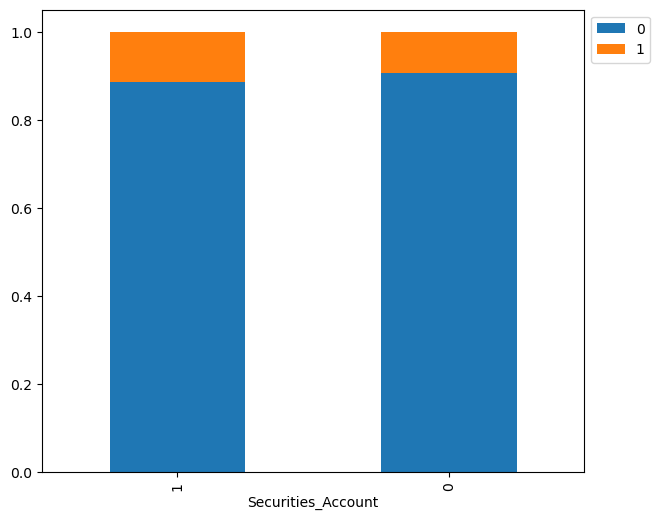

In [406]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

- Customers with securities accounts are slightly more likely to have a loan.

#### Observations on Personal Loan by CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


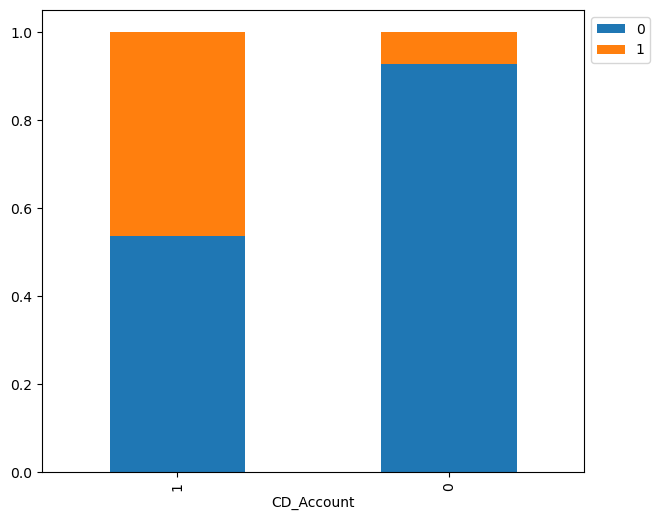

In [407]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

- Customers with CD accounts are significantly more likely to have a loan.

#### Observations on Personal Loan by Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


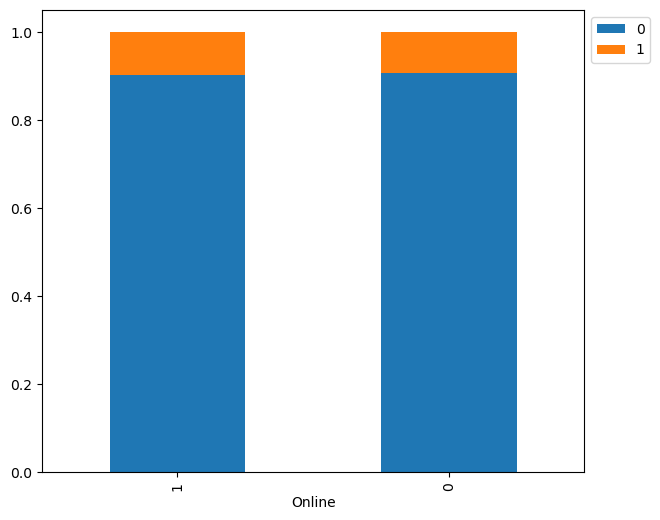

In [408]:
stacked_barplot(df, "Online", "Personal_Loan")

- Online customers were slightly more likely to have a loan.

#### Observations on Personal Loan by CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


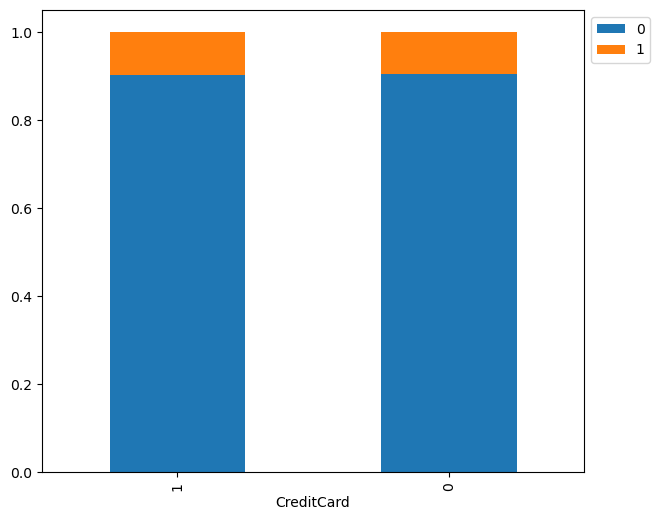

In [409]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

- Customers with credit cards at other institutions were slightly more likely to have a personal loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Missing Value Treatment

In [410]:
# checking for missing values
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values to treat.

### Feature Engineering

Note: need to consider scaling Age, Experience, Income, and Mortgage variables as they are continuous and often double digits.

In [411]:
'''Convert the datatype of categorical features ZIPCode,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard to "category" type in df'''
df["ZIPCode"] = df["ZIPCode"].astype("category")
df["Education"] = df["Education"].astype("category")
df["Personal_Loan"] = df["Personal_Loan"].astype("category")
df["Securities_Account"] = df["Securities_Account"].astype("category")
df["CD_Account"] = df["CD_Account"].astype("category")
df["Online"] = df["Online"].astype("category")
df["CreditCard"] = df["CreditCard"].astype("category")

### Outlier detection and treatment

In [412]:
Q1 = df.quantile(q=.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = df.quantile(q=.25)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [413]:
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Age          96.98000
Experience   97.64000
Income       98.38000
Family       70.56000
CCAvg        96.62000
Mortgage     30.76000
dtype: float64

Outliers were identified in the EDA. However, they seemed reasonable, and thus no treatment is deemed necessary.

### Data prep for Modeling

In [414]:
#Drop the dependent variable from the dataset and assign it to another variable.
X = df.drop(["Personal_Loan"], axis=1)
y = df["Personal_Loan"]

In [415]:
#Encode the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,ZIPCode_90007,ZIPCode_90009,ZIPCode_90011,ZIPCode_90016,ZIPCode_90018,ZIPCode_90019,ZIPCode_90024,ZIPCode_90025,ZIPCode_90027,ZIPCode_90028,ZIPCode_90029,ZIPCode_90032,ZIPCode_90033,ZIPCode_90034,ZIPCode_90035,ZIPCode_90036,ZIPCode_90037,ZIPCode_90041,ZIPCode_90044,ZIPCode_90045,ZIPCode_90048,ZIPCode_90049,ZIPCode_90057,ZIPCode_90058,ZIPCode_90059,ZIPCode_90064,ZIPCode_90065,ZIPCode_90066,ZIPCode_90068,ZIPCode_90071,ZIPCode_90073,ZIPCode_90086,ZIPCode_90089,ZIPCode_90095,ZIPCode_90210,ZIPCode_90212,ZIPCode_90230,ZIPCode_90232,ZIPCode_90245,ZIPCode_90250,ZIPCode_90254,ZIPCode_90266,ZIPCode_90272,ZIPCode_90274,ZIPCode_90275,ZIPCode_90277,ZIPCode_90280,ZIPCode_90291,ZIPCode_90304,ZIPCode_90401,ZIPCode_90404,ZIPCode_90405,ZIPCode_90502,ZIPCode_90503,ZIPCode_90504,ZIPCode_90505,ZIPCode_90509,ZIPCode_90601,ZIPCode_90623,ZIPCode_90630,ZIPCode_90638,ZIPCode_90639,ZIPCode_90640,ZIPCode_90650,ZIPCode_90717,ZIPCode_90720,ZIPCode_90740,ZIPCode_90745,ZIPCode_90747,ZIPCode_90755,ZIPCode_90813,ZIPCode_90840,ZIPCode_91006,ZIPCode_91007,ZIPCode_91016,ZIPCode_91024,ZIPCode_91030,ZIPCode_91040,ZIPCode_91101,ZIPCode_91103,ZIPCode_91105,ZIPCode_91107,ZIPCode_91109,ZIPCode_91116,ZIPCode_91125,ZIPCode_91129,ZIPCode_91203,ZIPCode_91207,ZIPCode_91301,ZIPCode_91302,ZIPCode_91304,ZIPCode_91311,ZIPCode_91320,ZIPCode_91326,ZIPCode_91330,ZIPCode_91335,ZIPCode_91342,ZIPCode_91343,ZIPCode_91345,ZIPCode_91355,ZIPCode_91360,ZIPCode_91361,ZIPCode_91365,ZIPCode_91367,ZIPCode_91380,ZIPCode_91401,ZIPCode_91423,ZIPCode_91604,ZIPCode_91605,ZIPCode_91614,ZIPCode_91706,ZIPCode_91709,ZIPCode_91710,ZIPCode_91711,ZIPCode_91730,ZIPCode_91741,ZIPCode_91745,ZIPCode_91754,ZIPCode_91763,ZIPCode_91765,ZIPCode_91768,ZIPCode_91770,ZIPCode_91773,ZIPCode_91775,ZIPCode_91784,ZIPCode_91791,ZIPCode_91801,ZIPCode_91902,ZIPCode_91910,ZIPCode_91911,ZIPCode_91941,ZIPCode_91942,ZIPCode_91950,ZIPCode_92007,ZIPCode_92008,ZIPCode_92009,ZIPCode_92024,ZIPCode_92028,ZIPCode_92029,ZIPCode_92037,ZIPCode_92038,ZIPCode_92054,ZIPCode_92056,ZIPCode_92064,ZIPCode_92068,ZIPCode_92069,ZIPCode_92084,ZIPCode_92093,ZIPCode_92096,ZIPCode_92101,ZIPCode_92103,ZIPCode_92104,ZIPCode_92106,ZIPCode_92109,ZIPCode_92110,ZIPCode_92115,ZIPCode_92116,ZIPCode_92120,ZIPCode_92121,ZIPCode_92122,ZIPCode_92123,ZIPCode_92124,ZIPCode_92126,ZIPCode_92129,ZIPCode_92130,ZIPCode_92131,ZIPCode_92152,ZIPCode_92154,ZIPCode_92161,ZIPCode_92173,ZIPCode_92177,ZIPCode_92182,ZIPCode_92192,ZIPCode_92220,ZIPCode_92251,ZIPCode_92325,ZIPCode_92333,ZIPCode_92346,ZIPCode_92350,ZIPCode_92354,ZIPCode_92373,ZIPCode_92374,ZIPCode_92399,ZIPCode_92407,ZIPCode_92507,ZIPCode_92518,ZIPCode_92521,ZIPCode_92606,ZIPCode_92612,ZIPCode_92614,ZIPCode_92624,ZIPCode_92626,ZIPCode_92630,ZIPCode_92634,ZIPCode_92646,ZIPCode_92647,ZIPCode_92648,ZIPCode_92653,ZIPCode_92660,ZIPCode_92661,ZIPCode_92672,ZIPCode_92673,ZIPCode_92675,ZIPCode_92677,ZIPCode_92691,ZIPCode_92692,ZIPCode_92694,ZIPCode_92697,ZIPCode_92703,ZIPCode_92704,ZIPCode_92705,ZIPCode_92709,ZIPCode_92717,ZIPCode_92735,ZIPCode_92780,ZIPCode_92806,ZIPCode_92807,ZIPCode_92821,ZIPCode_92831,ZIPCode_92833,ZIPCode_92834,ZIPCode_92835,ZIPCode_92843,ZIPCode_92866,ZIPCode_92867,ZIPCode_92868,ZIPCode_92870,ZIPCode_92886,ZIPCode_93003,ZIPCode_93009,ZIPCode_93010,ZIPCode_93014,ZIPCode_93022,ZIPCode_93023,ZIPCode_93033,ZIPCode_93063,ZIPCode_93065,ZIPCode_93077,ZIPCode_93101,ZIPCode_93105,ZIPCode_93106,ZIPCode_93107,ZIPCode_93108,ZIPCode_93109,ZIPCode_93111,ZIPCode_93117,ZIPCode_93118,ZIPCode_93302,ZIPCode_93305,ZIPCode_93311,ZIPCode_93401,ZIPCode_93403,ZIPCode_93407,ZIPCode_93437,ZIPCode_93460,ZIPCode_93524,ZIPCode_93555,ZIPCode_93561,ZIPCode_93611,ZIPCode_93657,ZIPCode_93711,ZIPCode_93720,ZIPCode_93727,ZIPCode_93907,ZIPCode_93933,ZIPCode_93940,ZIPCode_93943,ZIPCode_93950,ZIPCode_93955,ZIPCode_94002,ZIPCode_94005,ZIPCode_94010,ZIPCode_94015,ZIPCode_94019,ZIPCode_94022,ZIPCode_94024,ZIPCode_94025,ZIPCode_94028,ZIPCode_94035,ZIPCode_94040,ZIPCode_94043,ZIPCode_94061,ZIPCode

In [416]:
#Split the data into train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [417]:
'''show the number and percentage of observations in the train and test datasets'''
print("Number of observations in training data:", len(X_train))
print("Number of observations in test data:", len(X_test))
print(
    "Percentage of observations in training data:",
    len(X_train) / len(df) * 100,
)
print(
    "Percentage of observations in test data:",
    len(X_test) / len(df) * 100,
)

Number of observations in training data: 3500
Number of observations in test data: 1500
Percentage of observations in training data: 70.0
Percentage of observations in test data: 30.0


In [418]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.90543
1   0.09457
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   0.90067
1   0.09933
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

#### Model Purpose
To predict which customers are likely to purchase a personal loan with AllLife Bank.
#### Misclassifications (inaccurate predictions)
1. The model may predict a customer will purchase a loan, but in reality they won't. This is a waste of marketing resources on a customer that should not be targeted, also known as a loss of resources.
1. The model may predict a customer won't purchase a loan, but in reality they would have. This is a lost opportunity.
#### Which misclassification type is more harmful?
Assuming AllLife's marketing costs to target a customer are nominal, for example extra broadcast emails, web advertising, and perhaps sales calls, the wasted expense of targeting customers un-interested in loans is small. Whereas the opportunity cost of not pursuing a potentially willing customer is larger considering it's one of the bank's core business lines and strategic objectives. Thus, False Negatives that would wrongly identify a customer as not willing to purchase a loan should be minimized.
#### How to reduce this harm (False Negatives)
Recall for the model should be maximized as this reduces False Negatives.

In [419]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [420]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model Building (Default)

In [421]:
#Build the model with a class weight of "balanced" since the observations are lopsided with ~90% of the observations belonging to the class 0.
model = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

In [422]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


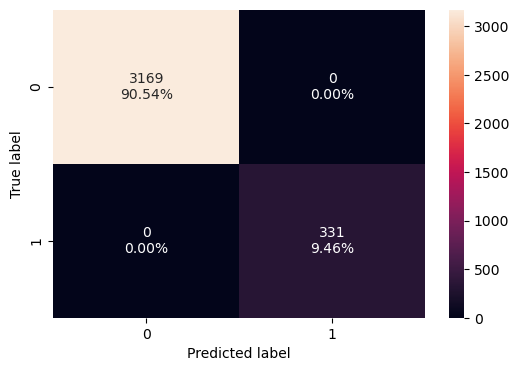

In [423]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [424]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97467,0.87919,0.86755,0.87333


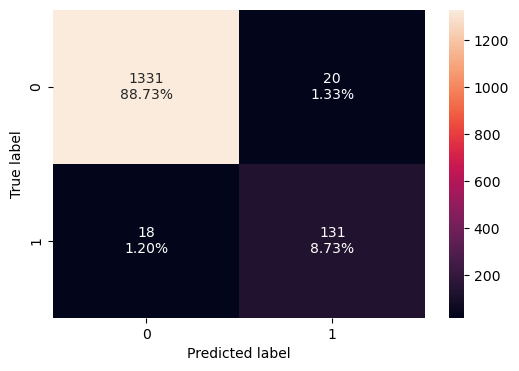

In [425]:
confusion_matrix_sklearn(model, X_test, y_test)

#### Visualizing the Decision Tree

In [426]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'ZIPCode_90007', 'ZIPCode_90009', 'ZIPCode_90011', 'ZIPCode_90016', 'ZIPCode_90018', 'ZIPCode_90019', 'ZIPCode_90024', 'ZIPCode_90025', 'ZIPCode_90027', 'ZIPCode_90028', 'ZIPCode_90029', 'ZIPCode_90032', 'ZIPCode_90033', 'ZIPCode_90034', 'ZIPCode_90035', 'ZIPCode_90036', 'ZIPCode_90037', 'ZIPCode_90041', 'ZIPCode_90044', 'ZIPCode_90045', 'ZIPCode_90048', 'ZIPCode_90049', 'ZIPCode_90057', 'ZIPCode_90058', 'ZIPCode_90059', 'ZIPCode_90064', 'ZIPCode_90065', 'ZIPCode_90066', 'ZIPCode_90068', 'ZIPCode_90071', 'ZIPCode_90073', 'ZIPCode_90086', 'ZIPCode_90089', 'ZIPCode_90095', 'ZIPCode_90210', 'ZIPCode_90212', 'ZIPCode_90230', 'ZIPCode_90232', 'ZIPCode_90245', 'ZIPCode_90250', 'ZIPCode_90254', 'ZIPCode_90266', 'ZIPCode_90272', 'ZIPCode_90274', 'ZIPCode_90275', 'ZIPCode_90277', 'ZIPCode_90280', 'ZIPCode_90291', 'ZIPCode_90304', 'ZIPCode_90401', 'ZIPCode_90404', 'ZIPCode_90405', 'ZIPCode_90502', 'ZIPCode_90503', 'ZIPCode_90504', 'Z

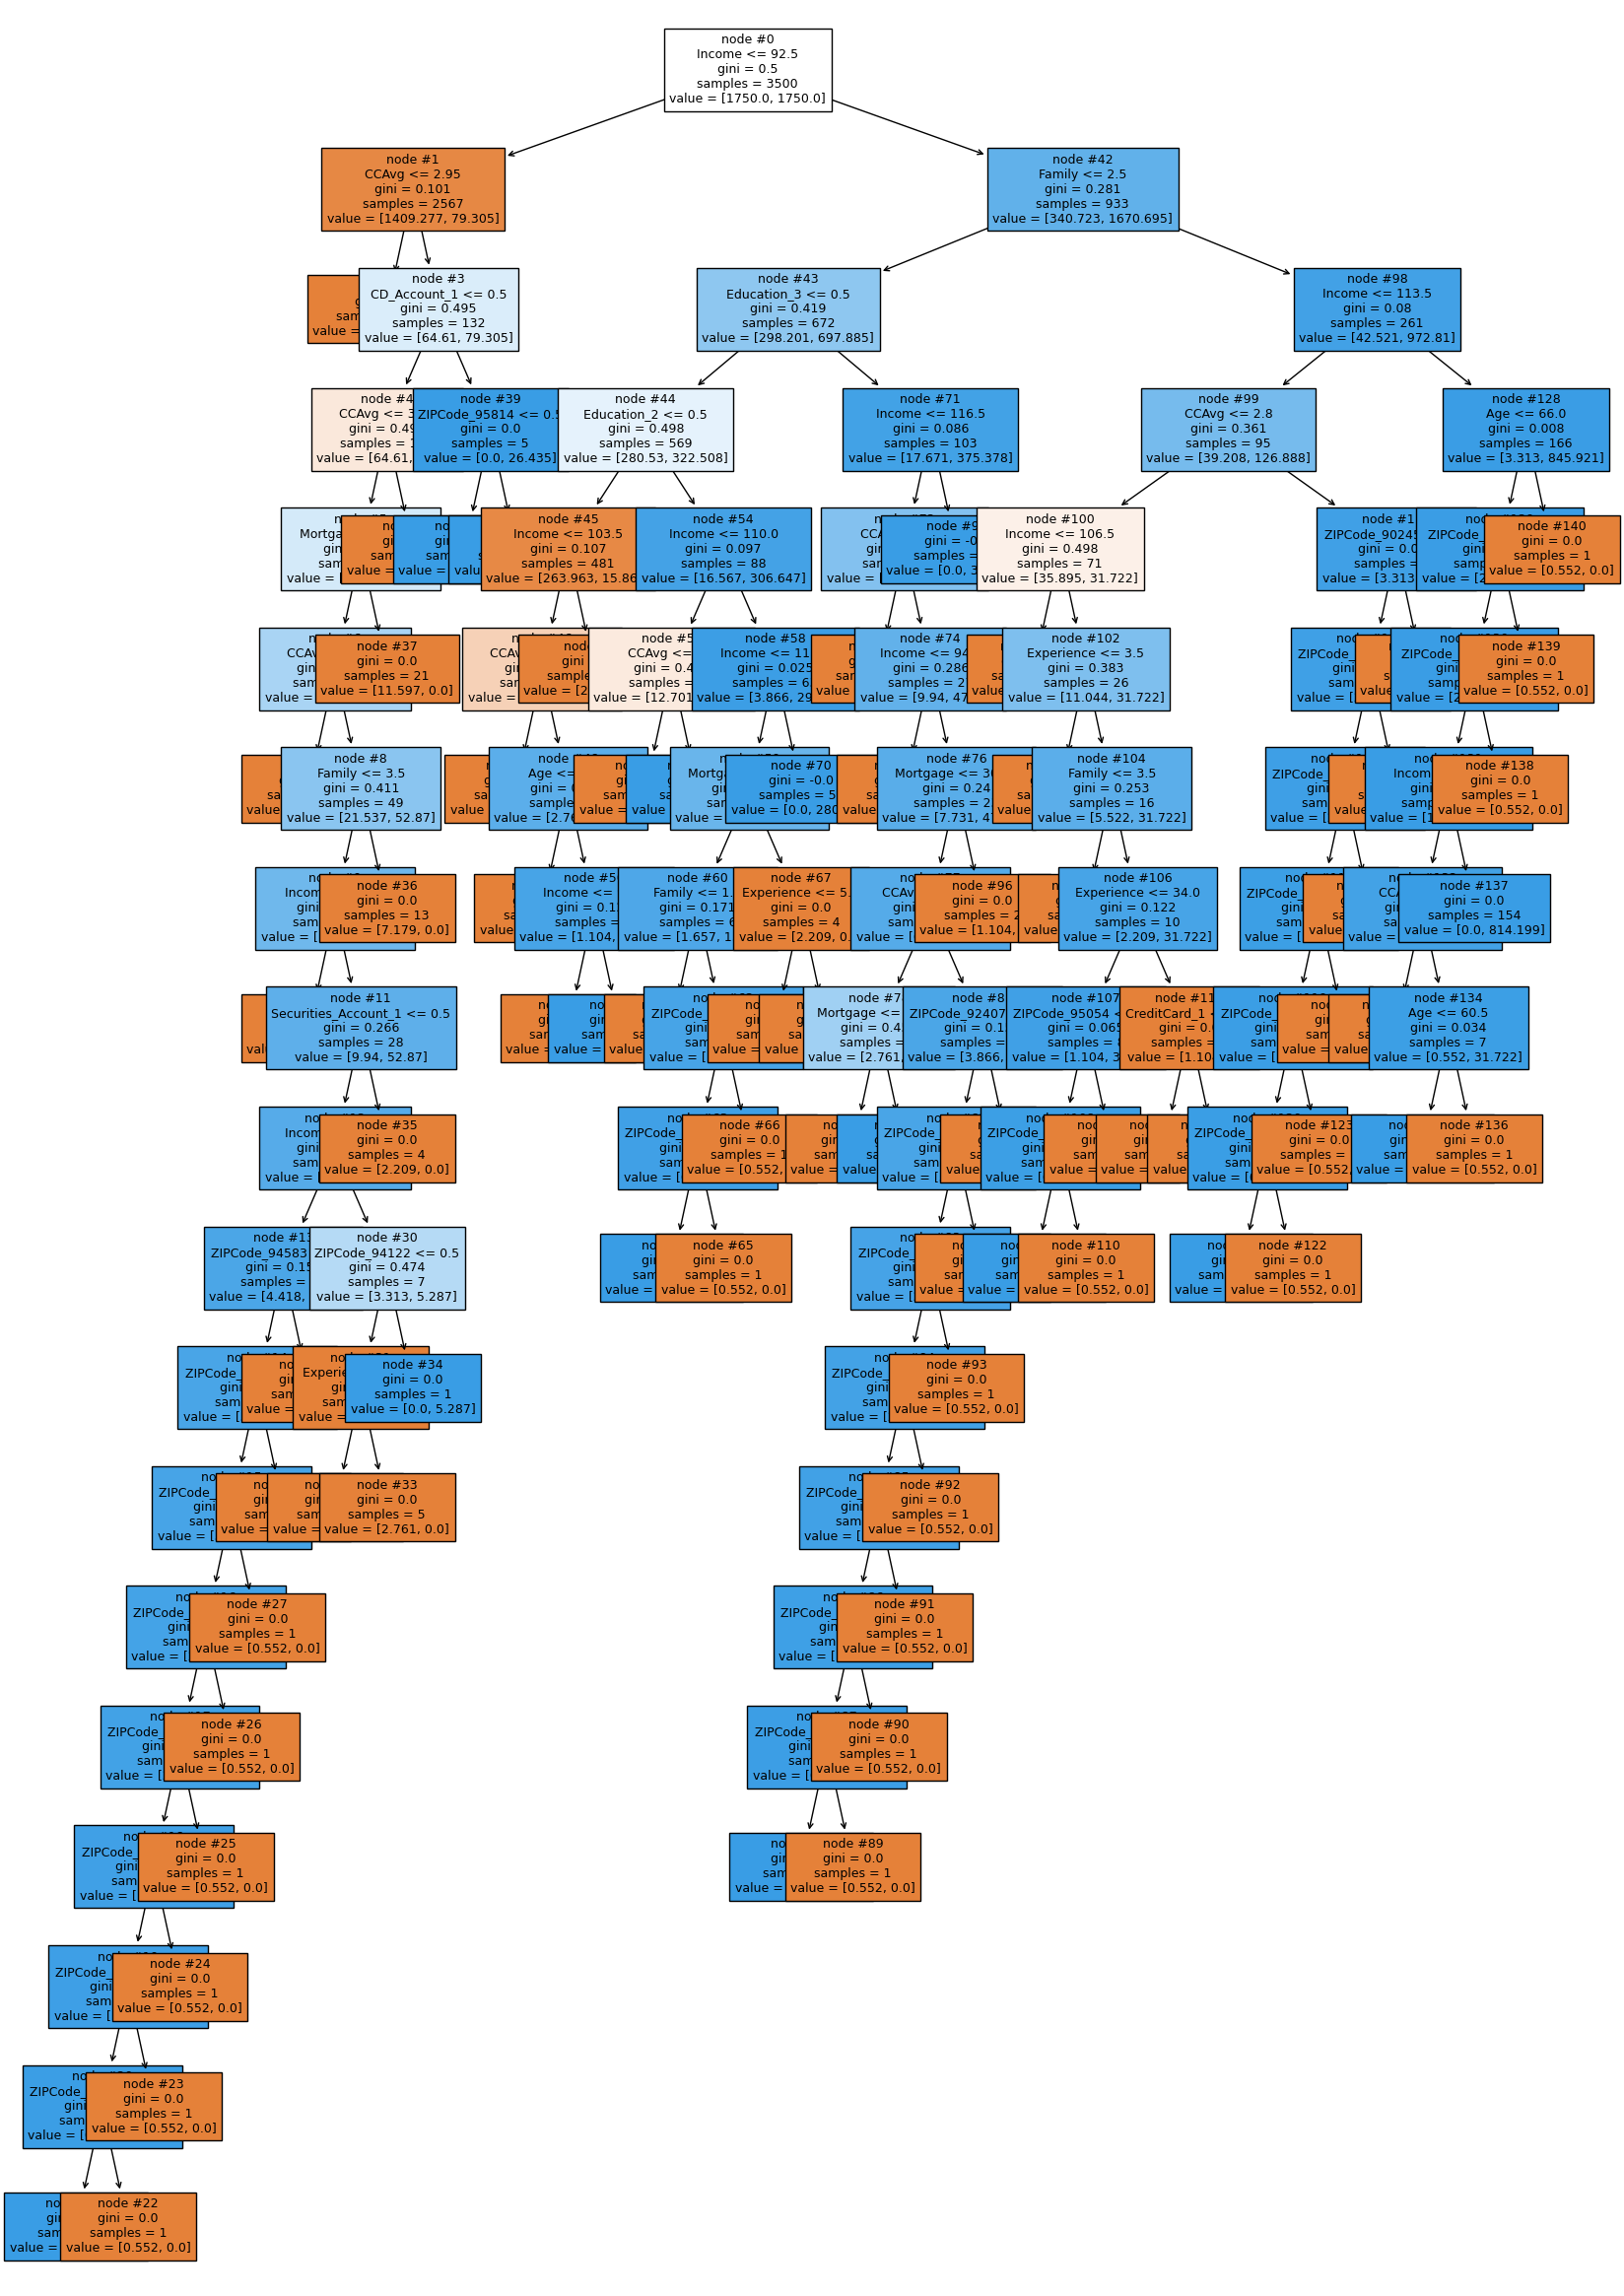

In [427]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [428]:
# Text report showing the rules of a decision tree
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [4.42, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- Securities_Account_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_94583 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_94583 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |  

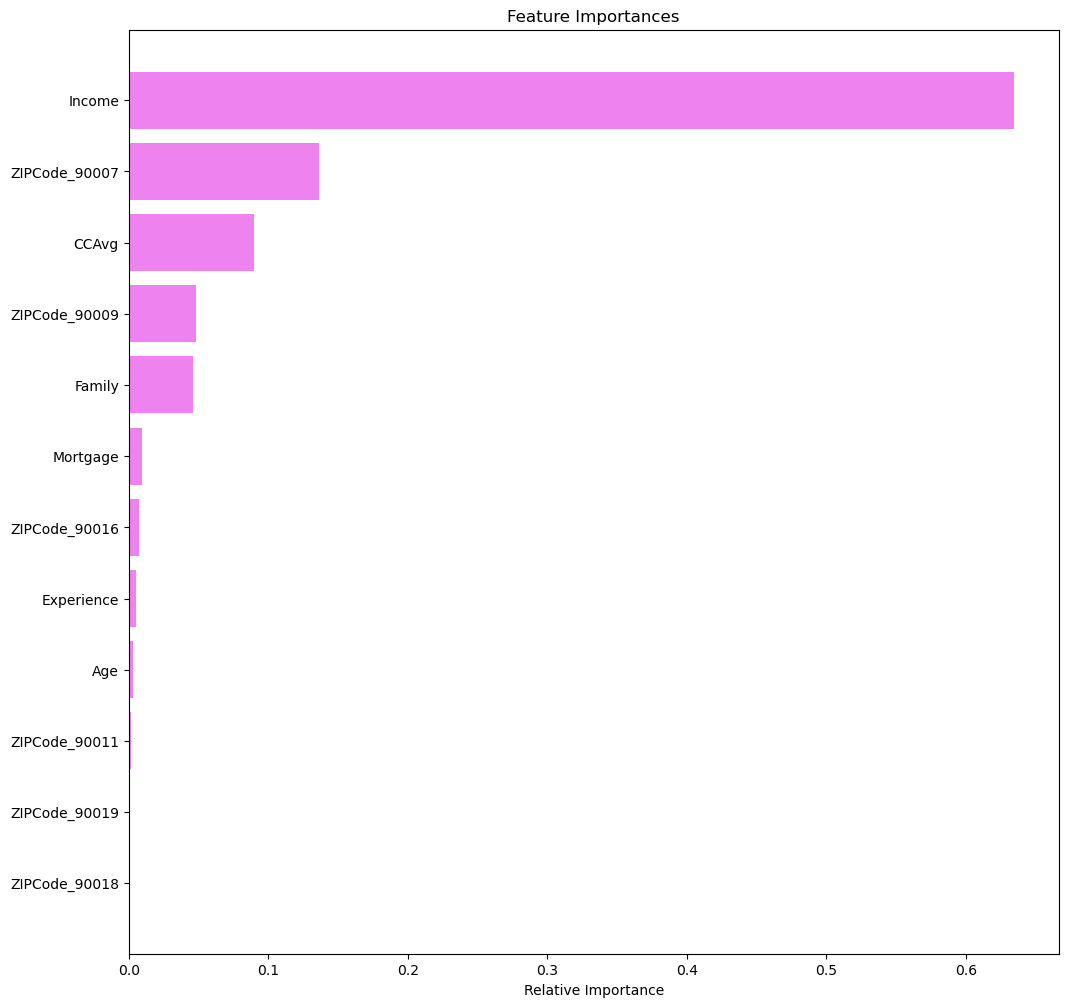

In [429]:
importances = model.feature_importances_
'''Remove values that start with "ZIPCode_" from importances'''
importances = importances[~np.array([i.startswith("ZIPCode_") for i in feature_names])]
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The decision tree is very deep with many branches. Income, Family size, and Zipcode are the most important features for classifying bank customers. 

## Model Performance Improvement

### Decision Tree Model Building (Pre-pruning)

#### Using GridSearch for Hyperparameter tuning of our tree model
* Let's see if we can improve our model performance even more.

In [430]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
"class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 30, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations; optimize for recall.
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

In [431]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.79029,1.00000,0.31080,0.47421


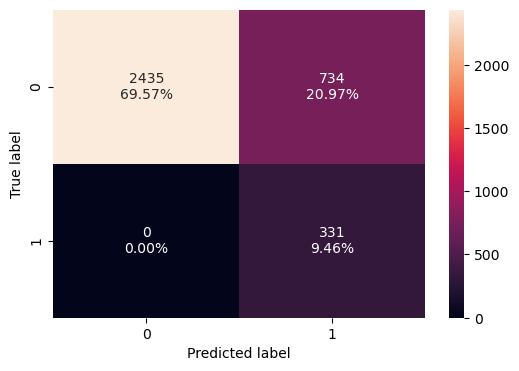

In [432]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* No False Negatives are reported, thus a perfect Recall score of 1.

#### Checking model performance on test set

In [433]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.77933,1.00000,0.31042,0.47377


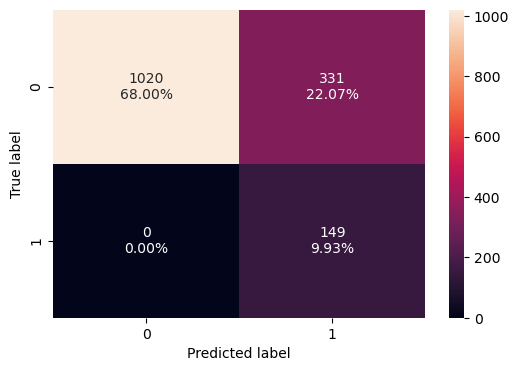

In [434]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model eliminates False Negatives, which is our priority to not miss willing customers. Other performance scores decrease, but we are not as concerned with them as there is not a great cost associated with other erroneous results.

#### Visualizing the Decision Tree

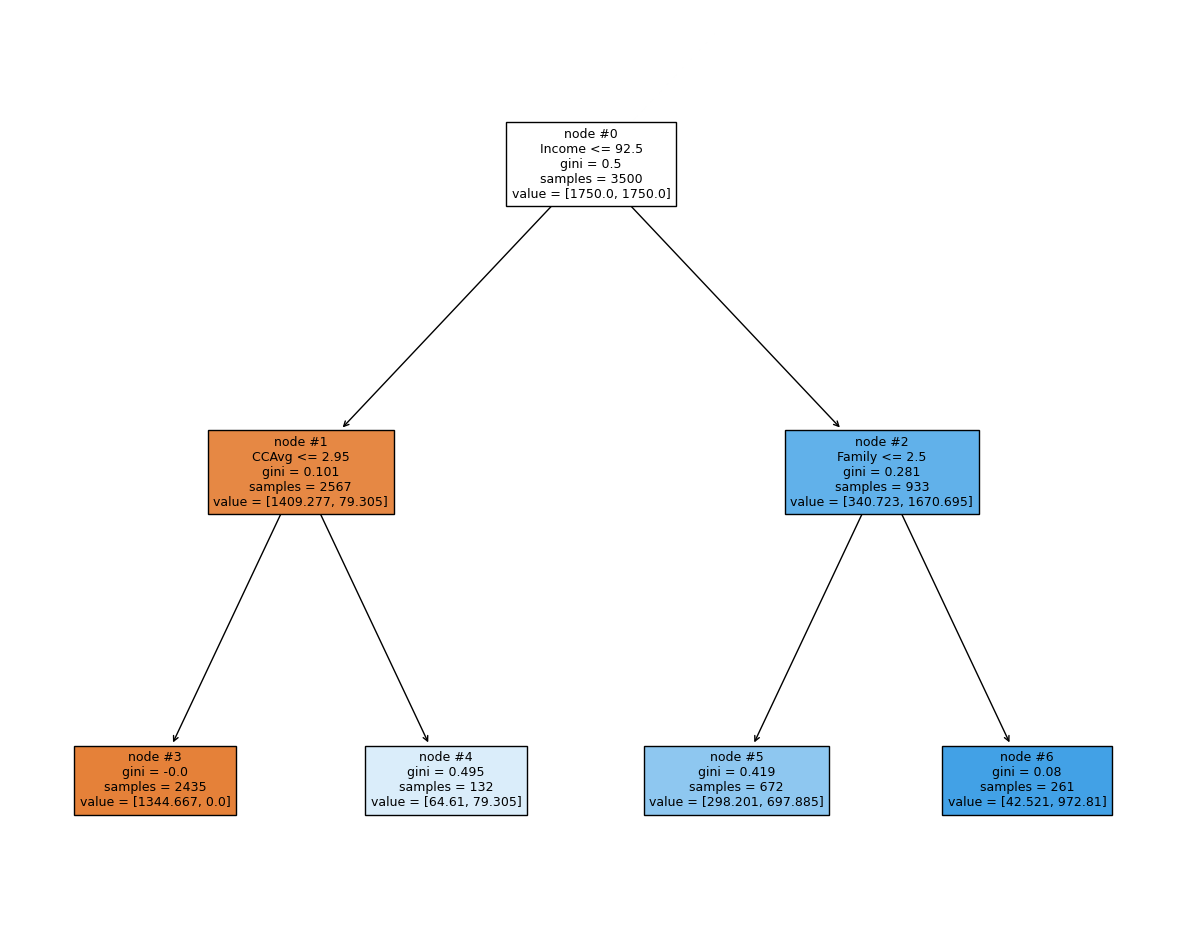

In [435]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=None,
)
plt.show()

In [436]:
# Text report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



The decision tree is much simpler with less depth than original - indicating it is more generalized and not over-fitted to the training dataset.

In [437]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                  Imp
Income        0.87653
CCAvg         0.06694
Family        0.05653
Age           0.00000
ZIPCode_94306 0.00000
...               ...
ZIPCode_92104 0.00000
ZIPCode_92103 0.00000
ZIPCode_92101 0.00000
ZIPCode_92096 0.00000
CreditCard_1  0.00000

[478 rows x 1 columns]


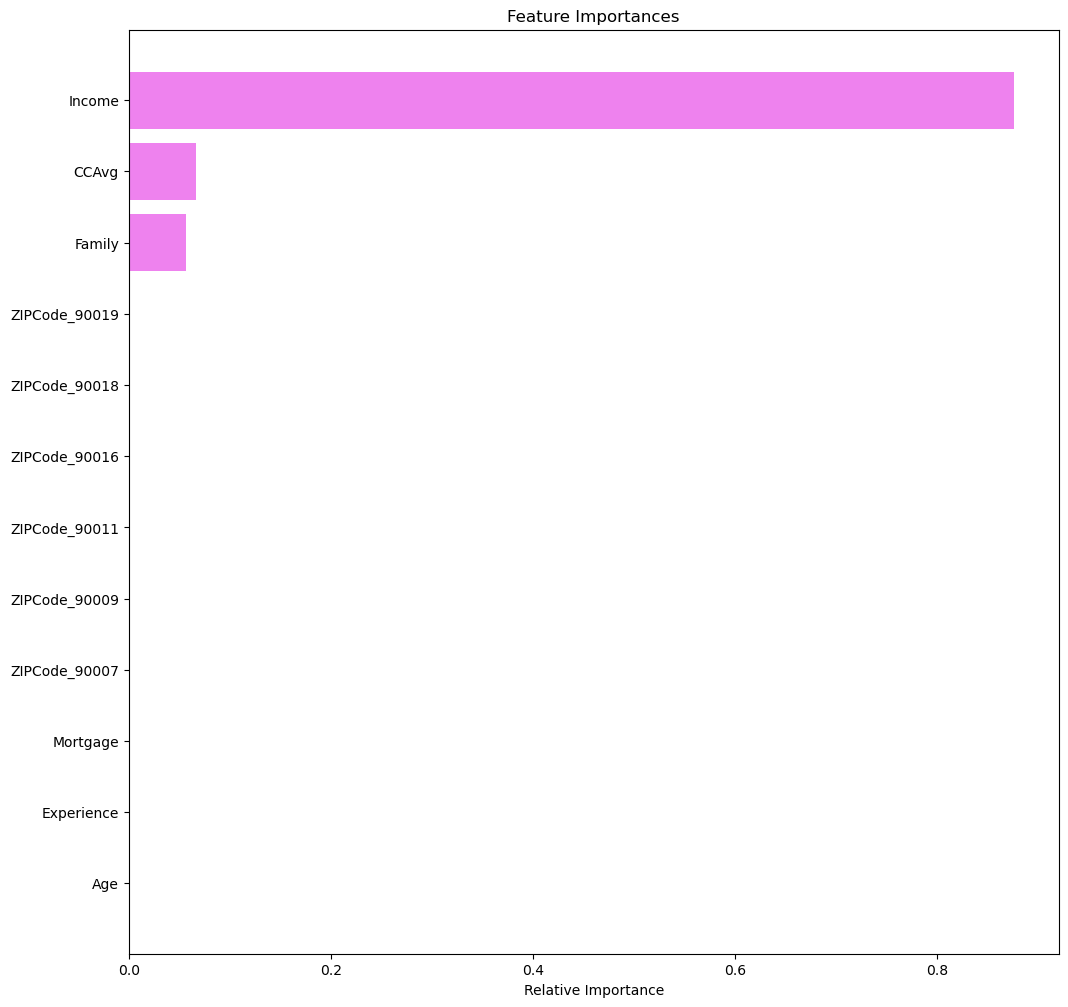

In [438]:
importances = estimator.feature_importances_
'''Remove values that start with "ZIPCode_" from importances'''
importances = importances[~np.array([i.startswith("ZIPCode_") for i in feature_names])]
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, Credit Card average balance, and Family size are the most important attributes.

### Decision Tree Model Building (Cost Complexity Post-pruning)

In [439]:
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [440]:
pd.DataFrame(path)
#As the alpha value increases, the number of nodes decreases, thus the complexity of the tree decreases; however impurity increases leading to less accuracy in training data

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00029,0.00086
6,0.00029,0.00317
7,0.00029,0.00519
8,0.00030,0.00580
9,0.00030,0.00763


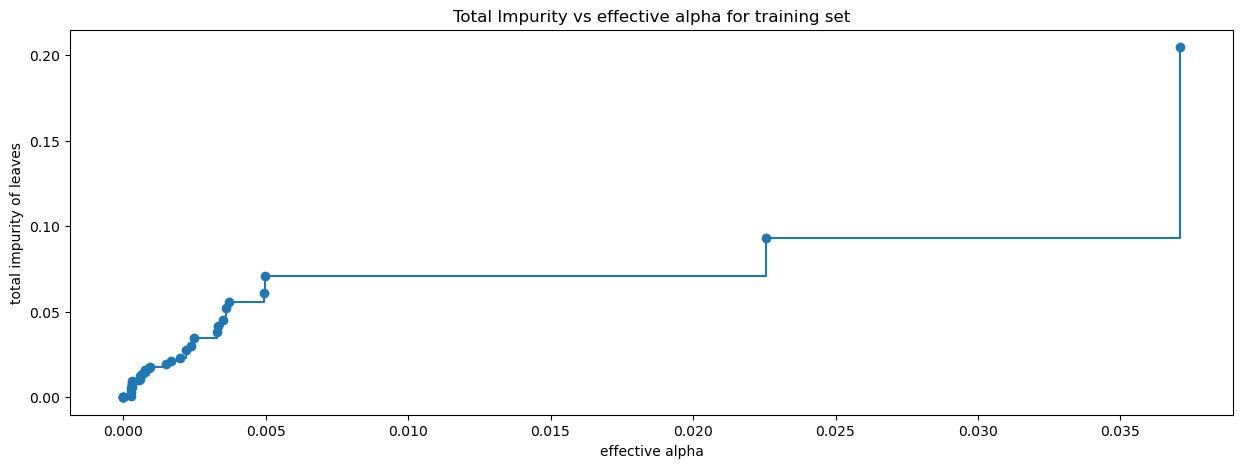

In [441]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [442]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923225



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

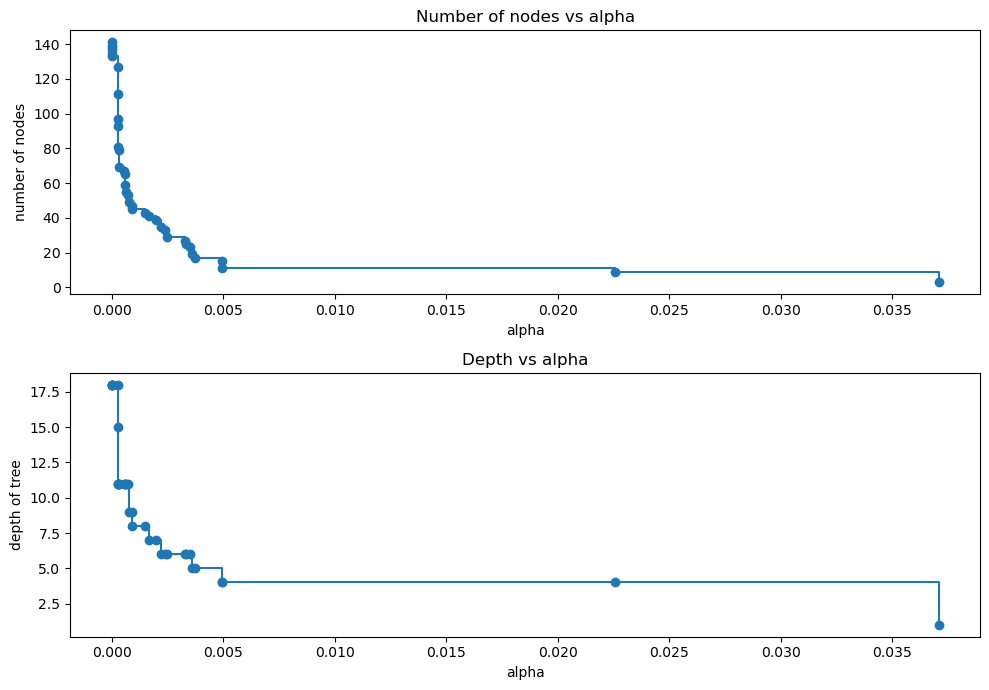

In [443]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Recall vs alpha for training and testing sets

In [444]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [445]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

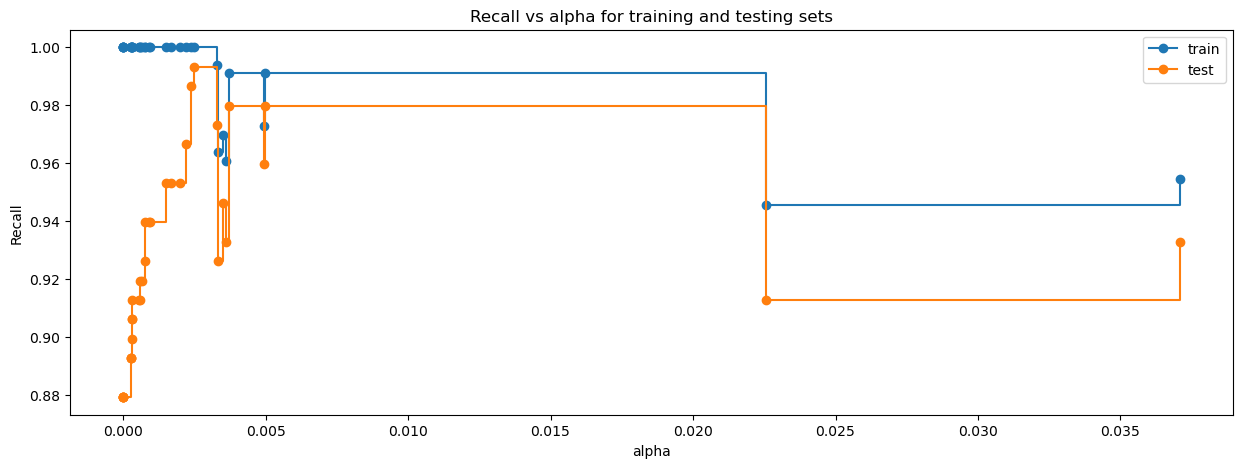

In [446]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [447]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0024726598786421437, class_weight='balanced',
                       random_state=1)


#### Checking model performance on training set

In [448]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.95686,1.00000,0.68672,0.81427


Recall is perfect and Precision, F1, and Accuracy are much better than the pre-pruned model.

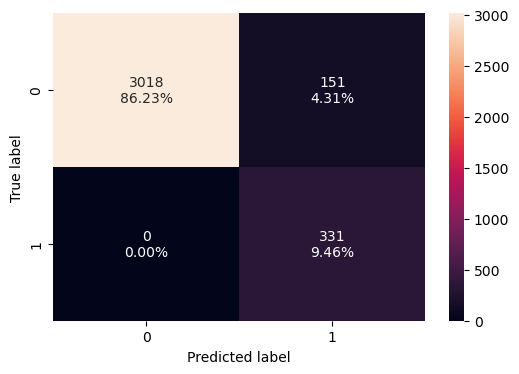

In [449]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [450]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.94867,0.99329,0.66071,0.79357


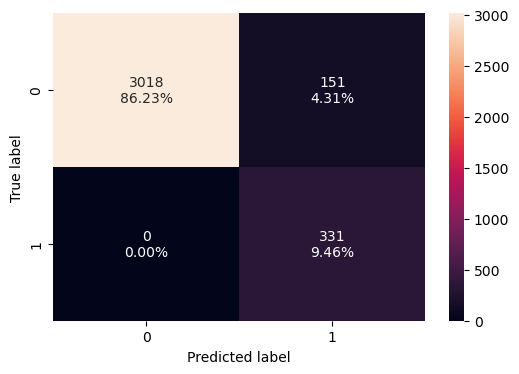

In [451]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall is near perfect and other performance scores are better than the pre-pruned model.

#### Visualizing the Decision Tree

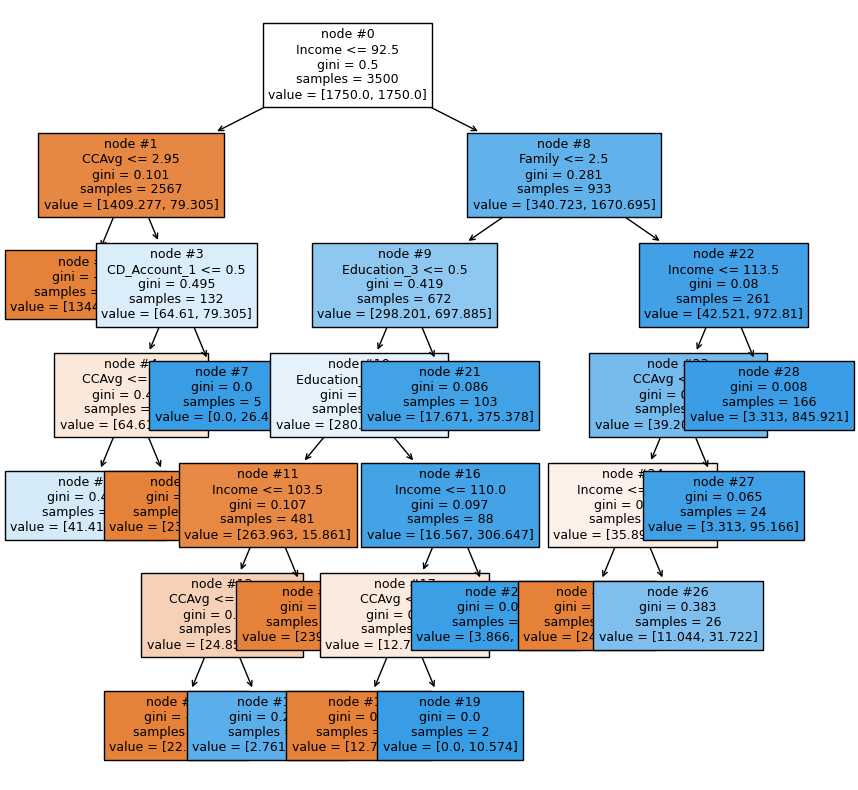

In [452]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [453]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights:

The tree is simpler than the original but more complex than pre-pruned tree.

In [454]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                  Imp
Income        0.66884
Education_2   0.14661
CCAvg         0.08395
Education_3   0.05162
Family        0.04095
...               ...
ZIPCode_92104 0.00000
ZIPCode_92103 0.00000
ZIPCode_92101 0.00000
ZIPCode_92096 0.00000
CreditCard_1  0.00000

[478 rows x 1 columns]


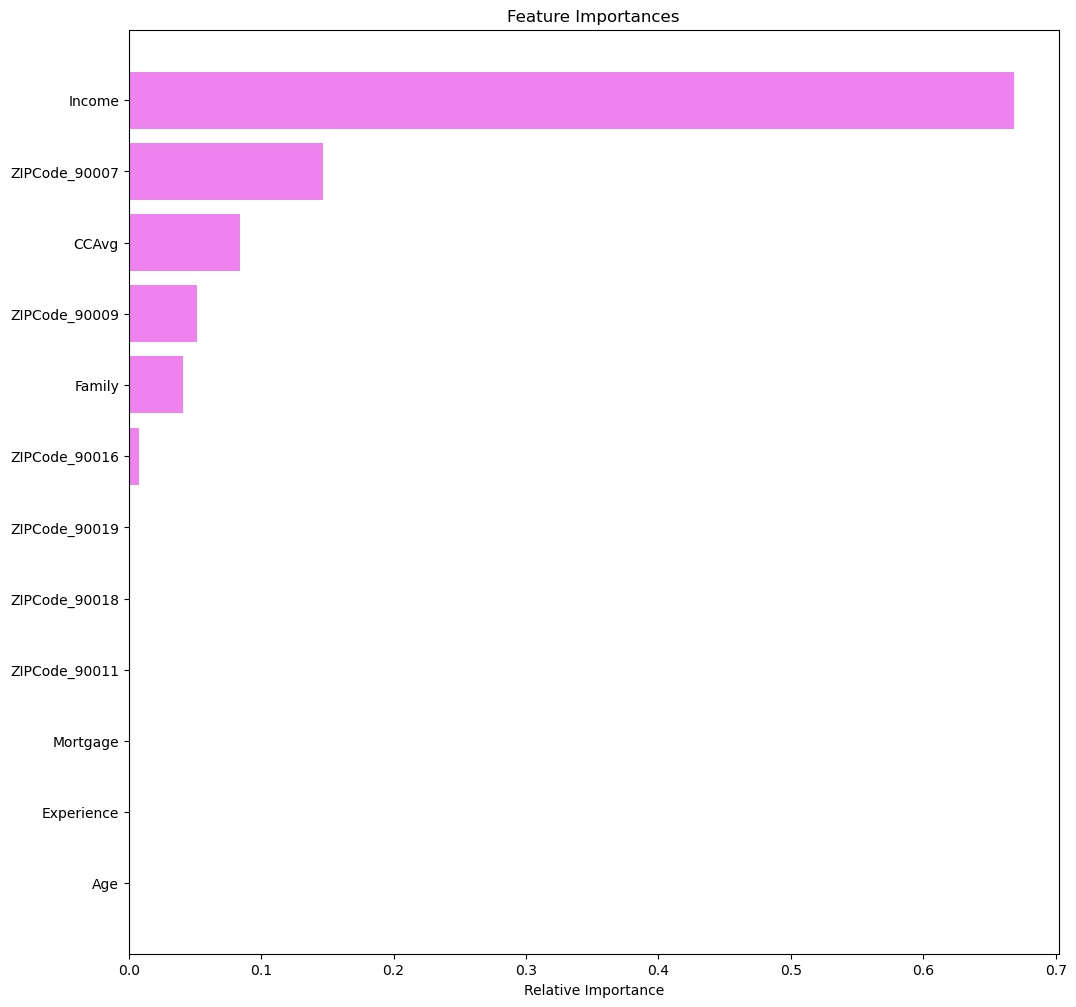

In [455]:
importances = best_model.feature_importances_
'''Remove values that start with "ZIPCode_" from importances'''
importances = importances[~np.array([i.startswith("ZIPCode_") for i in feature_names])]
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [456]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,0.79029,0.95686
Recall,1.00000,1.00000,1.00000
Precision,1.00000,0.31080,0.68672
F1,1.00000,0.47421,0.81427


In [457]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.97467,0.77933,0.94867
Recall,0.87919,1.00000,0.99329
Precision,0.86755,0.31042,0.66071
F1,0.87333,0.47377,0.79357


## Actionable Insights and Business Recommendations


* Generally speaking, the incremental marketing costs to target customers are small. So the business should error on the side of over-marketing rather than missing potential loan customers.
* However, some care should be taken to not frustrate uninterested customers with marketing calls, emails, etc. for personal loans. An opt-out of future loan marketing should be available to customers.
* Income, Family size, Credit Card Average, and Zipcode are the most important variables in determining if customers will purchase a personal loan.
* The Decision Tree with Post-Pruning model has a near perfect Recall score, which is an indicator of minimized False Negative misclassifications. Minimizing False Negative predictions by the model is important so we do not miss marketing to willing customers.
* Additionally, the F1, Accuracy, and Precision are all higher for the Post-pruned model - again validating this as the prediction model to use. This means fewer customers who are uninterested in personal loans will be faced with marketing from AllLife for them - which would occur in False Positive predictions.  Only ~4% of customers would get such marketing contacts.
* The predictive capabilities of the decision tree model are decent. But other techniques such as Logistic Regression would be good to try and compare as well.